# Results v6:

## General Hyperparameters:

- Dataset: MNIST (scaled down to 14x14)
- Model: 2-layer MLP (196-32-ReLU-10)
- Training batch size: 32
- Optimizer: SGD
- Learning rate: 0.001
- Epochs: 5

## GGN Hyperparameters:
- GGN batch sizes: $[2^i]_{i=0}^{12}$
- GGN computations after $n$ training steps: $n \in \{0, 4000, 8000\}$
- GGN samples per computation iteration: 8
- GGN approximation error measures: Eigenspace-overlap

## LA Hyperparameters:
- LTK batch sizes: $[2^i]_{i=0}^{12}$
- LTK computations after $n$ training steps: $n \in \{9375\}$
- LTK samples per computation iteration: 8

In [28]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

In [45]:
results_path = "../results_v6/eig_overlap_14px/"
min_exp = 0
max_exp = 13
n_samples = 8
ggn_iteration_freq = 4000
num_ggn_iterations = 3
sampling_methods = ["uniform", "loss_classeq", "loss_classeq_inv", "loss_class", "loss_class_inv", "loss", "loss_inv", "total"]

iterations = [ggn_iteration_freq * x for x in range(0, num_ggn_iterations)]
sample_sizes = [2**x for x in range(min_exp, max_exp)]

## Eigenspace Overlap (LOBPCG vs. EIGH):

In [46]:
eig_vals = {}
eig_overlap = {}

for sampling_method in sampling_methods:
    eig_vals[sampling_method]= []
    eig_overlap[sampling_method] = []
    for iters in iterations:
        eig_vals[sampling_method].append([])
        eig_overlap[sampling_method].append([])
        if sampling_method == "total":
            eig_vals[sampling_method][-1].append(np.load(str(Path(results_path, sampling_methods[0], f"eigh_eigvals_total_{iters}.npy"))))
            eig_overlap[sampling_method][-1].append(np.load(str(Path(results_path, sampling_methods[0], f"lobpcg_eigh_overlap_total_{iters}.npy"))).flatten())
        else:
            for batch_size in sample_sizes:
                eig_vals[sampling_method][-1].append(np.load(str(Path(results_path, sampling_method, f"eigh_eigvals_{batch_size}_batched_{iters}.npy"))))
                eig_overlap[sampling_method][-1].append(np.load(str(Path(results_path, sampling_method, f"lobpcg_eigh_overlap_{batch_size}_batched_{iters}.npy"))).flatten())
        eig_vals[sampling_method][-1] = np.stack(eig_vals[sampling_method][-1])
        eig_overlap[sampling_method][-1] = np.nan_to_num(np.stack(eig_overlap[sampling_method][-1]))


### Loss-classeq

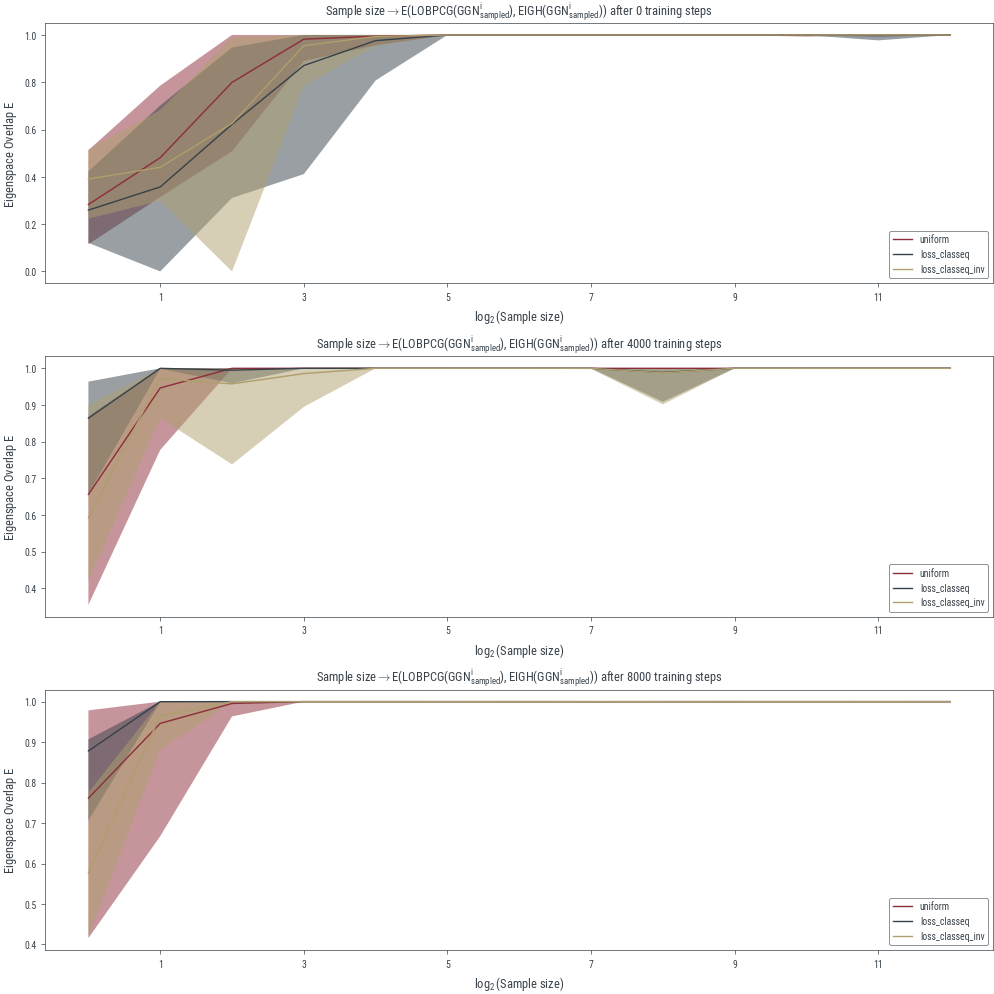

In [47]:
sampling_methods_plot = ["uniform", "loss_classeq", "loss_classeq_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for sample_method in sampling_methods_plot:
    for iters_idx, iters in enumerate(iterations):
        y = np.broadcast_to(eig_overlap[sample_method][iters_idx], (len(sample_sizes), n_samples))
        axs[iters_idx].plot(sample_sizes, y.mean(axis=1), label=sample_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(y, axis=1), np.max(y, axis=1), alpha=0.5)
        axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{LOBPCG}(\\text{GGN}^{i}_{\\text{sampled}}), \\text{EIGH}(\\text{GGN}^{i}_{\\text{sampled}}))$ after " + str(iters) + " training steps")
        axs[iters_idx].set_xscale('log', base=2)
        axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
        xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
        axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
        axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
        axs[iters_idx].legend(loc="lower right");

### Loss-class

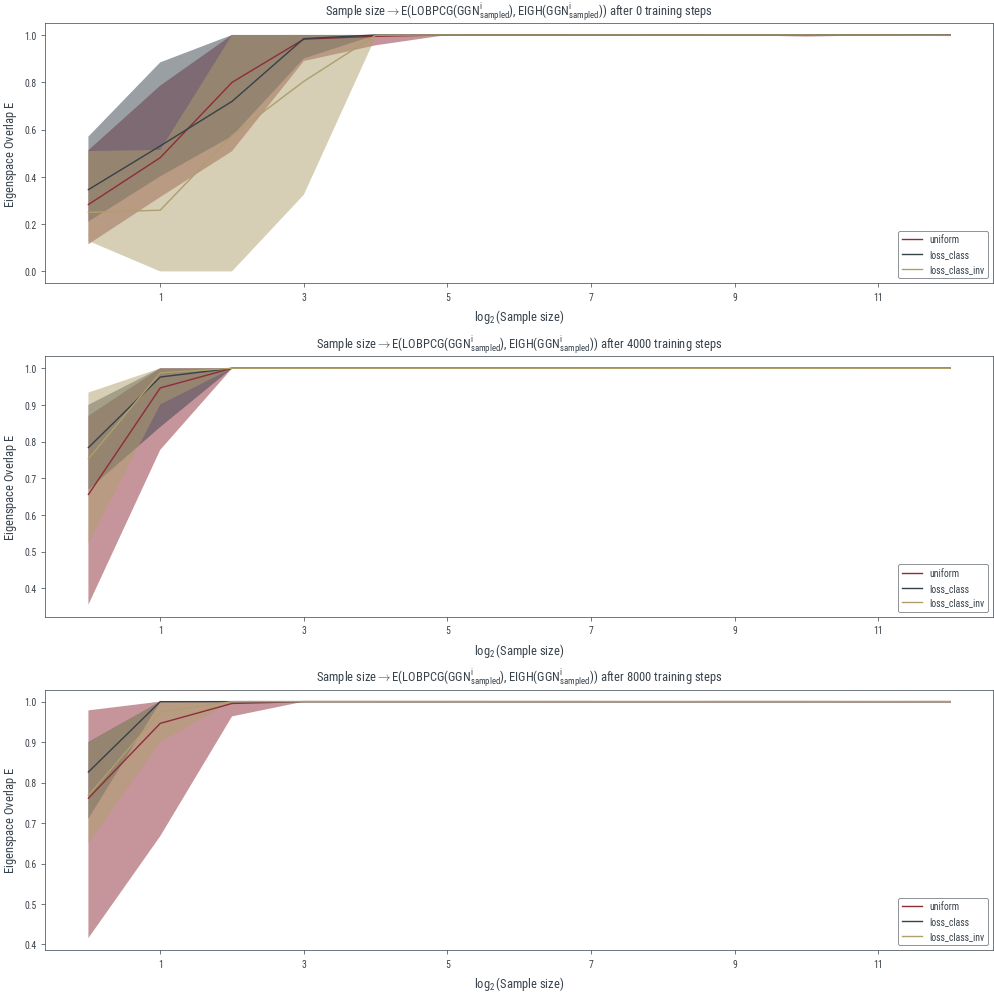

In [48]:
sampling_methods_plot = ["uniform", "loss_class", "loss_class_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for sample_method in sampling_methods_plot:
    for iters_idx, iters in enumerate(iterations):
        y = np.broadcast_to(eig_overlap[sample_method][iters_idx], (len(sample_sizes), n_samples))
        axs[iters_idx].plot(sample_sizes, y.mean(axis=1), label=sample_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(y, axis=1), np.max(y, axis=1), alpha=0.5)
        axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{LOBPCG}(\\text{GGN}^{i}_{\\text{sampled}}), \\text{EIGH}(\\text{GGN}^{i}_{\\text{sampled}}))$ after " + str(iters) + " training steps")
        axs[iters_idx].set_xscale('log', base=2)
        axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
        xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
        axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
        axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
        axs[iters_idx].legend(loc="lower right");

### Loss

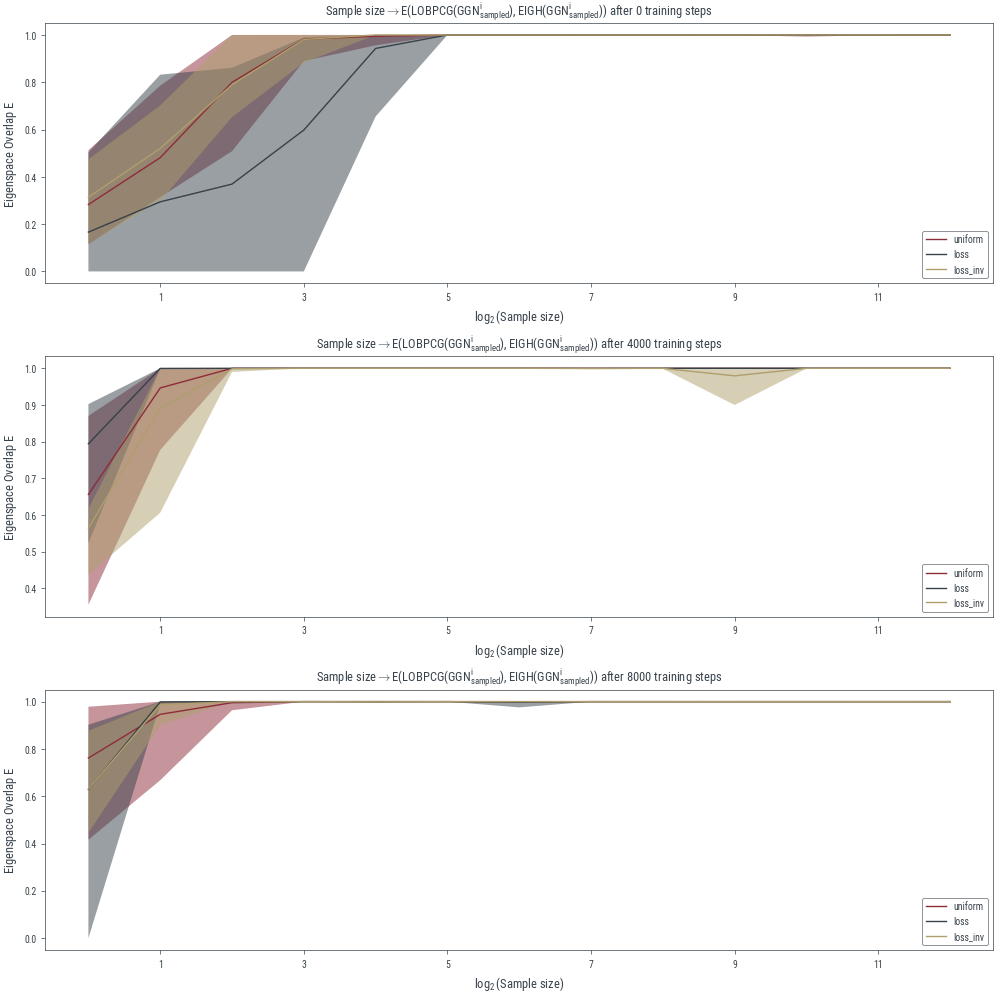

In [49]:
sampling_methods_plot = ["uniform", "loss", "loss_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for sample_method in sampling_methods_plot:
    for iters_idx, iters in enumerate(iterations):
        y = np.broadcast_to(eig_overlap[sample_method][iters_idx], (len(sample_sizes), n_samples))
        axs[iters_idx].plot(sample_sizes, y.mean(axis=1), label=sample_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(y, axis=1), np.max(y, axis=1), alpha=0.5)
        axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{LOBPCG}(\\text{GGN}^{i}_{\\text{sampled}}), \\text{EIGH}(\\text{GGN}^{i}_{\\text{sampled}}))$ after " + str(iters) + " training steps")
        axs[iters_idx].set_xscale('log', base=2)
        axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
        xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
        axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
        axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
        axs[iters_idx].legend(loc="lower right");

## Eigenspectra Analysis:

### Loss-classeq

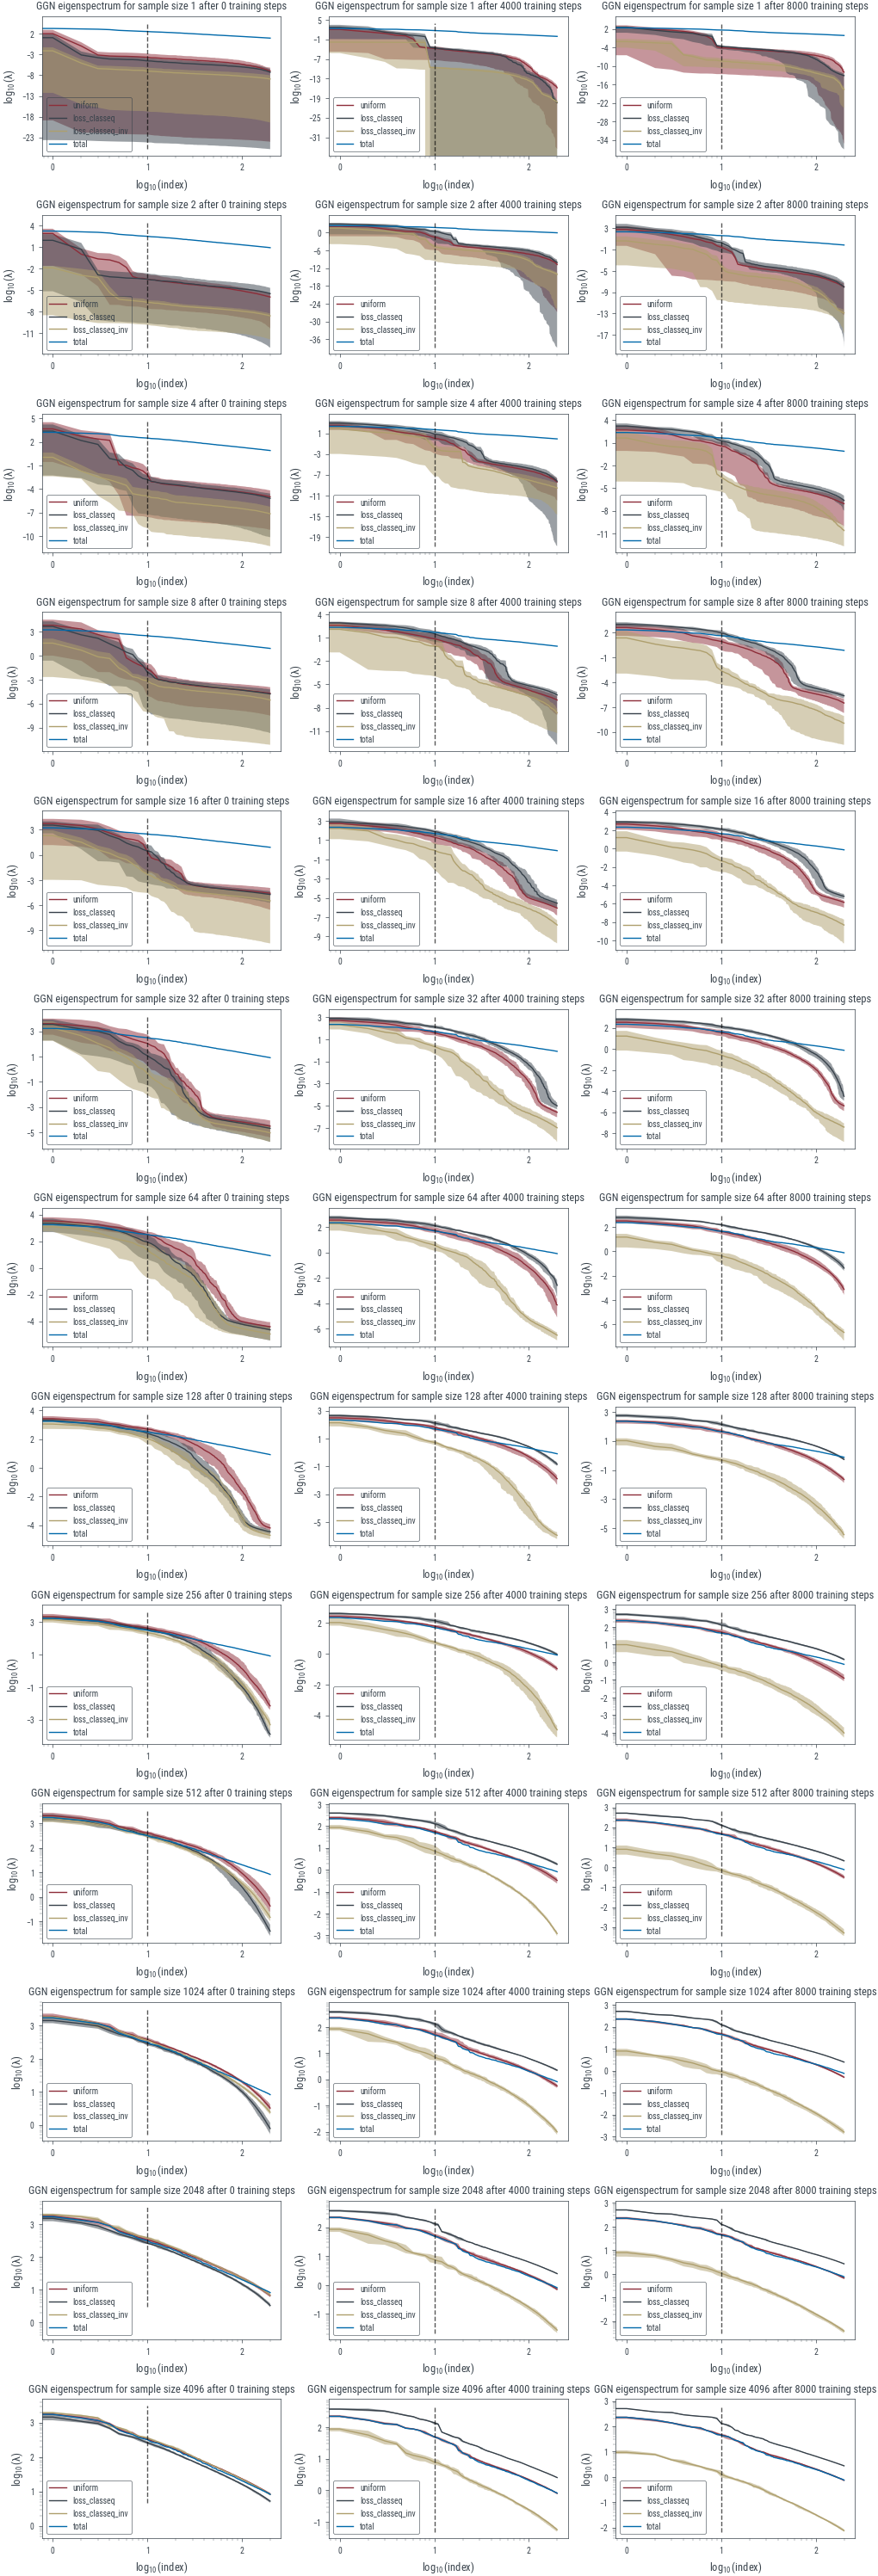

In [50]:
C = 10
L = 200

sampling_methods_plot = ["uniform", "loss_classeq", "loss_classeq_inv", "total"]
fig, axs = plt.subplots(len(sample_sizes), num_ggn_iterations, figsize=(10, 30))

for samples_idx, sample_size in enumerate(sample_sizes):
    for iters_idx, iters in enumerate(iterations):
        min_eigval_overall = np.inf
        max_eigval_overall = -np.inf
        for sample_method in sampling_methods_plot:
            y = np.broadcast_to(eig_vals[sample_method][iters_idx], (len(sample_sizes), n_samples, eig_vals[sample_method][iters_idx].shape[-1]))
            
            mean_eigval = np.mean(y[samples_idx], axis=0)[:L]
            min_eigval = np.min(y[samples_idx], axis=0)[:L]
            max_eigval = np.max(y[samples_idx], axis=0)[:L]
            
            min_eigval_overall = min(min_eigval_overall, min_eigval[-1])
            max_eigval_overall = max(max_eigval_overall, max_eigval[0])
            
            axs[samples_idx, iters_idx].plot(np.arange(L), mean_eigval, label=sample_method)
            axs[samples_idx, iters_idx].fill_between(np.arange(L), min_eigval, max_eigval, alpha=0.5)
            axs[samples_idx, iters_idx].set_title(f"GGN eigenspectrum for sample size {sample_size} after {iters} training steps")
            axs[samples_idx, iters_idx].set_xscale("log")
            xlogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].xaxis.set_major_formatter(xlogfmt)
            axs[samples_idx, iters_idx].set_xlabel("$\\log_{10}{(\\text{index})}$")
            axs[samples_idx, iters_idx].set_yscale("log")
            ylogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].yaxis.set_major_formatter(ylogfmt)
            axs[samples_idx, iters_idx].set_ylabel("$\\log_{10}{(\\lambda)}$")
            axs[samples_idx, iters_idx].legend(loc="lower left");
        
        axs[samples_idx, iters_idx].vlines(C, min_eigval_overall, max_eigval_overall, linestyles="dashed", colors=["black"], alpha=0.66)

### Loss-class

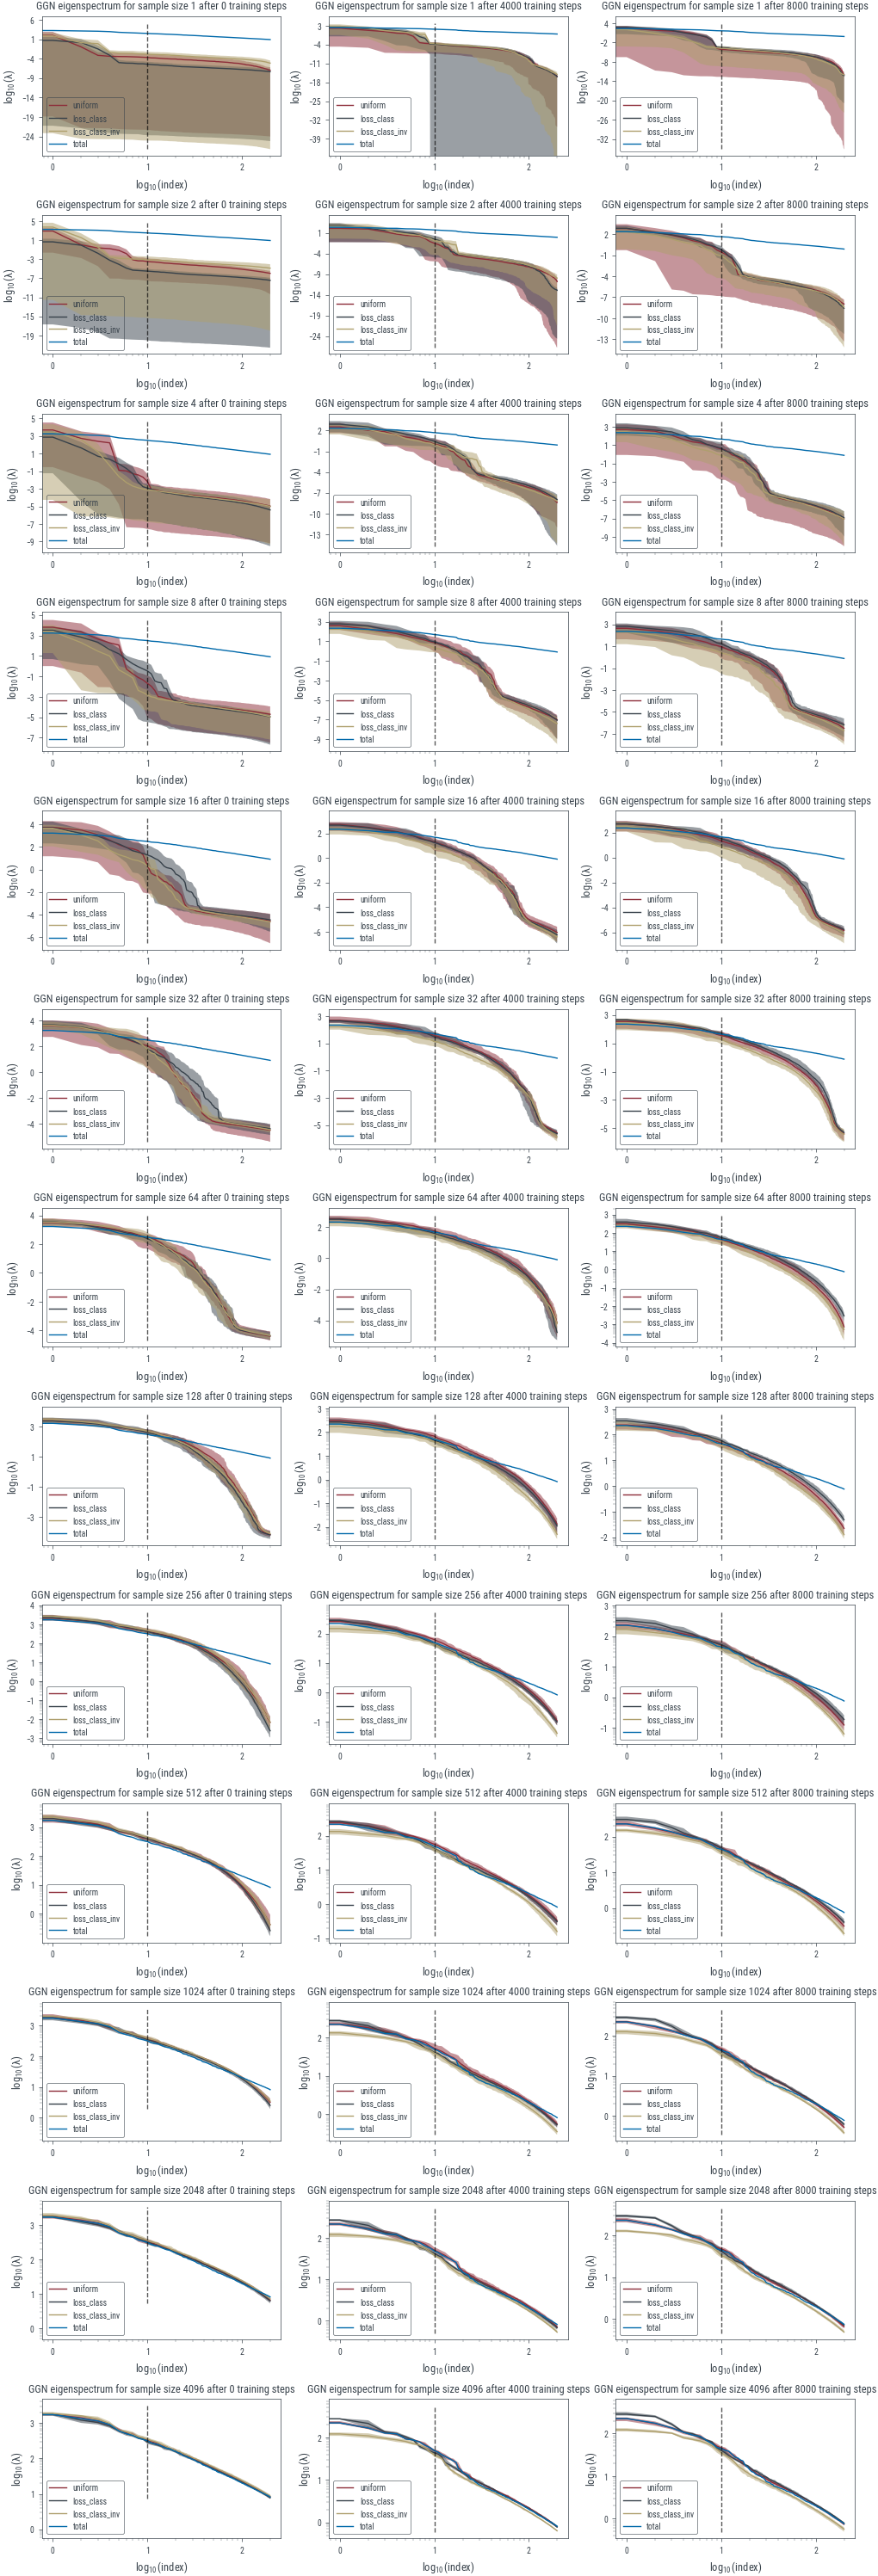

In [51]:
sampling_methods_plot = ["uniform", "loss_class", "loss_class_inv", "total"]
fig, axs = plt.subplots(len(sample_sizes), num_ggn_iterations, figsize=(10, 30))

for samples_idx, sample_size in enumerate(sample_sizes):
    for iters_idx, iters in enumerate(iterations):
        min_eigval_overall = np.inf
        max_eigval_overall = -np.inf
        for sample_method in sampling_methods_plot:
            y = np.broadcast_to(eig_vals[sample_method][iters_idx], (len(sample_sizes), n_samples, eig_vals[sample_method][iters_idx].shape[-1]))
            
            mean_eigval = np.mean(y[samples_idx], axis=0)[:L]
            min_eigval = np.min(y[samples_idx], axis=0)[:L]
            max_eigval = np.max(y[samples_idx], axis=0)[:L]
            
            min_eigval_overall = min(min_eigval_overall, min_eigval[-1])
            max_eigval_overall = max(max_eigval_overall, max_eigval[0])
            
            axs[samples_idx, iters_idx].plot(np.arange(L), mean_eigval, label=sample_method)
            axs[samples_idx, iters_idx].fill_between(np.arange(L), min_eigval, max_eigval, alpha=0.5)
            axs[samples_idx, iters_idx].set_title(f"GGN eigenspectrum for sample size {sample_size} after {iters} training steps")
            axs[samples_idx, iters_idx].set_xscale("log")
            xlogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].xaxis.set_major_formatter(xlogfmt)
            axs[samples_idx, iters_idx].set_xlabel("$\\log_{10}{(\\text{index})}$")
            axs[samples_idx, iters_idx].set_yscale("log")
            ylogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].yaxis.set_major_formatter(ylogfmt)
            axs[samples_idx, iters_idx].set_ylabel("$\\log_{10}{(\\lambda)}$")
            axs[samples_idx, iters_idx].legend(loc="lower left");
        
        axs[samples_idx, iters_idx].vlines(C, min_eigval_overall, max_eigval_overall, linestyles="dashed", colors=["black"], alpha=0.66)

### Loss

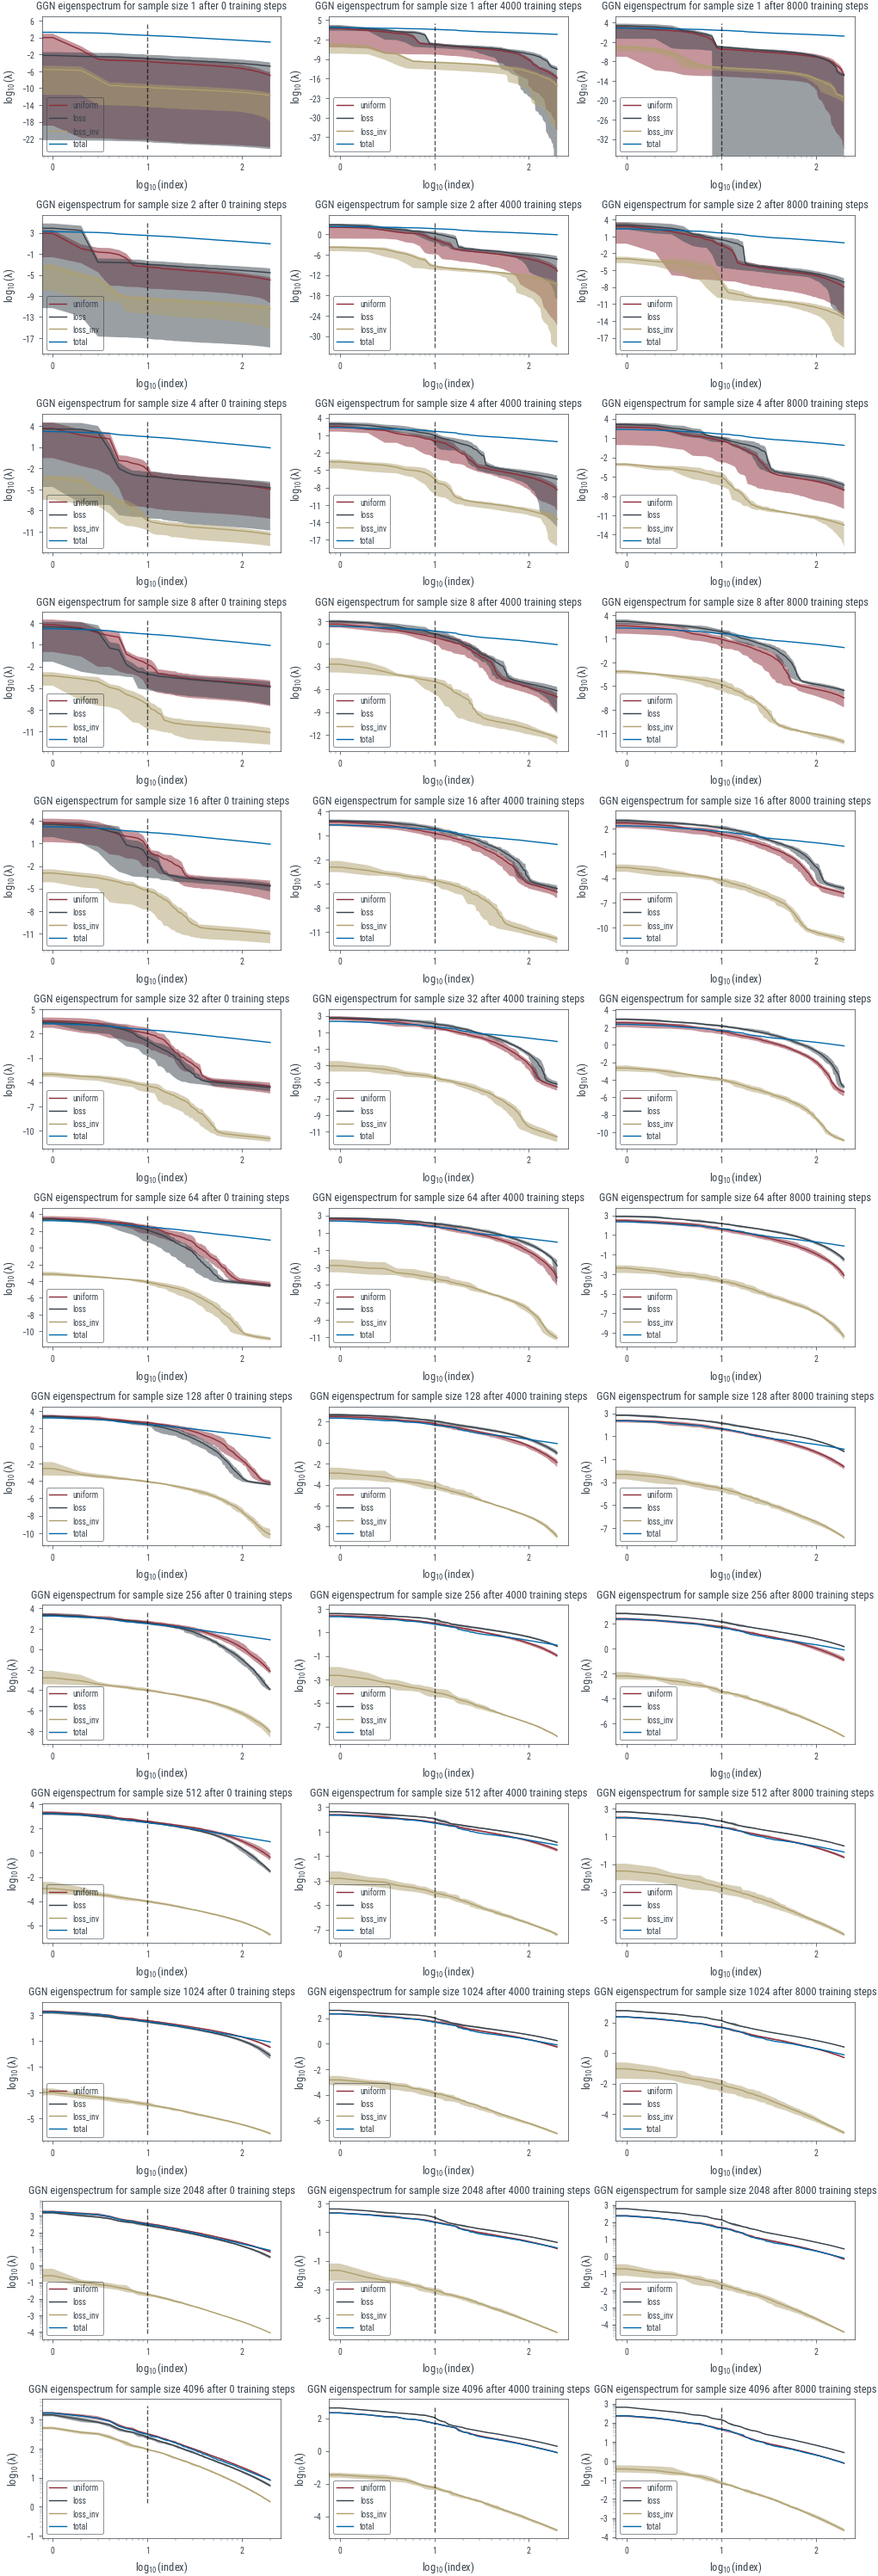

In [52]:
sampling_methods_plot = ["uniform", "loss", "loss_inv", "total"]
fig, axs = plt.subplots(len(sample_sizes), num_ggn_iterations, figsize=(10, 30))

for samples_idx, sample_size in enumerate(sample_sizes):
    for iters_idx, iters in enumerate(iterations):
        min_eigval_overall = np.inf
        max_eigval_overall = -np.inf
        for sample_method in sampling_methods_plot:
            y = np.broadcast_to(eig_vals[sample_method][iters_idx], (len(sample_sizes), n_samples, eig_vals[sample_method][iters_idx].shape[-1]))
            
            mean_eigval = np.mean(y[samples_idx], axis=0)[:L]
            min_eigval = np.min(y[samples_idx], axis=0)[:L]
            max_eigval = np.max(y[samples_idx], axis=0)[:L]
            
            min_eigval_overall = min(min_eigval_overall, min_eigval[-1])
            max_eigval_overall = max(max_eigval_overall, max_eigval[0])
            
            axs[samples_idx, iters_idx].plot(np.arange(L), mean_eigval, label=sample_method)
            axs[samples_idx, iters_idx].fill_between(np.arange(L), min_eigval, max_eigval, alpha=0.5)
            axs[samples_idx, iters_idx].set_title(f"GGN eigenspectrum for sample size {sample_size} after {iters} training steps")
            axs[samples_idx, iters_idx].set_xscale("log")
            xlogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].xaxis.set_major_formatter(xlogfmt)
            axs[samples_idx, iters_idx].set_xlabel("$\\log_{10}{(\\text{index})}$")
            axs[samples_idx, iters_idx].set_yscale("log")
            ylogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].yaxis.set_major_formatter(ylogfmt)
            axs[samples_idx, iters_idx].set_ylabel("$\\log_{10}{(\\lambda)}$")
            axs[samples_idx, iters_idx].legend(loc="lower left");
        
        axs[samples_idx, iters_idx].vlines(C, min_eigval_overall, max_eigval_overall, linestyles="dashed", colors=["black"], alpha=0.66)

### Best

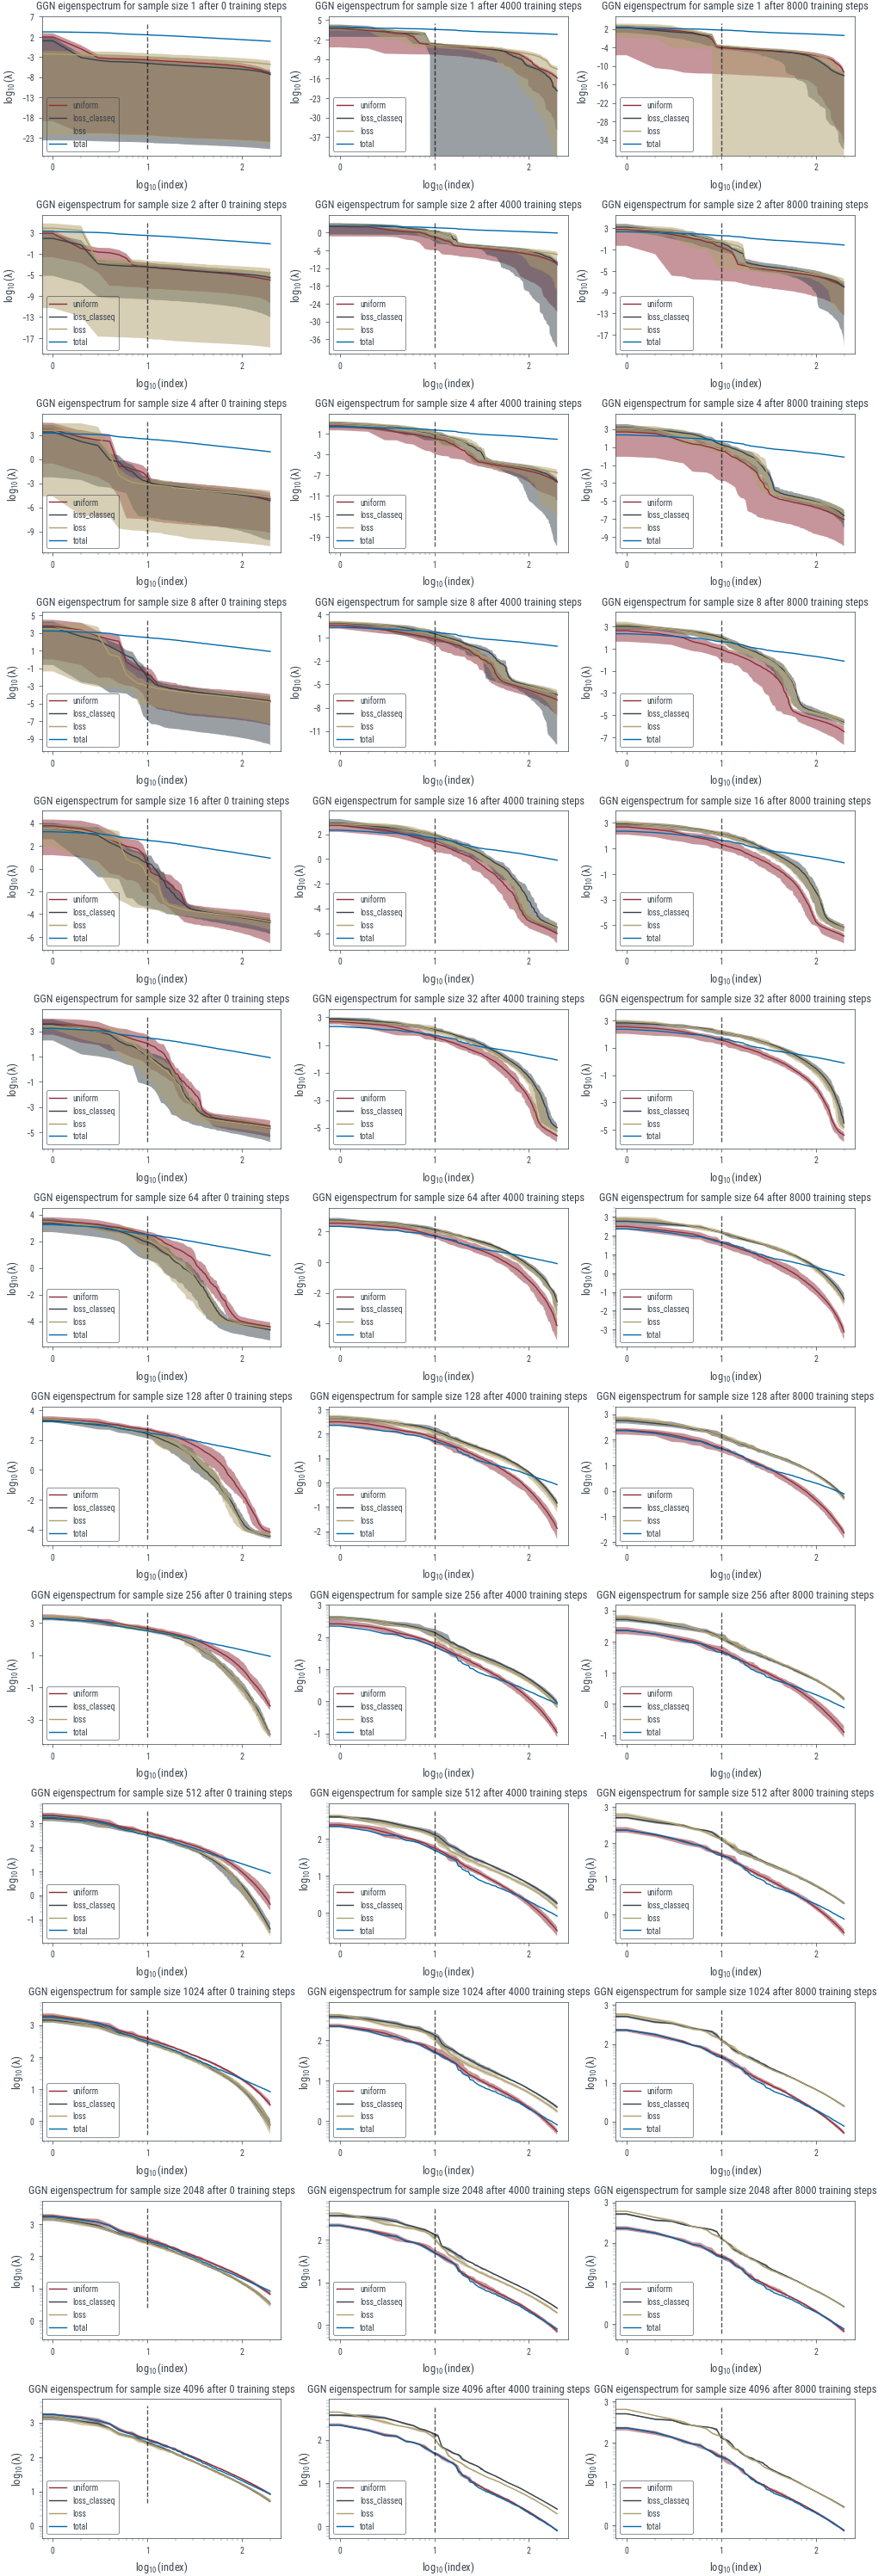

In [53]:
sampling_methods_plot = ["uniform", "loss_classeq", "loss", "total"]
fig, axs = plt.subplots(len(sample_sizes), num_ggn_iterations, figsize=(10, 30))

for samples_idx, sample_size in enumerate(sample_sizes):
    for iters_idx, iters in enumerate(iterations):
        min_eigval_overall = np.inf
        max_eigval_overall = -np.inf
        for sample_method in sampling_methods_plot:
            y = np.broadcast_to(eig_vals[sample_method][iters_idx], (len(sample_sizes), n_samples, eig_vals[sample_method][iters_idx].shape[-1]))
            
            mean_eigval = np.mean(y[samples_idx], axis=0)[:L]
            min_eigval = np.min(y[samples_idx], axis=0)[:L]
            max_eigval = np.max(y[samples_idx], axis=0)[:L]
            
            min_eigval_overall = min(min_eigval_overall, min_eigval[-1])
            max_eigval_overall = max(max_eigval_overall, max_eigval[0])
            
            axs[samples_idx, iters_idx].plot(np.arange(L), mean_eigval, label=sample_method)
            axs[samples_idx, iters_idx].fill_between(np.arange(L), min_eigval, max_eigval, alpha=0.5)
            axs[samples_idx, iters_idx].set_title(f"GGN eigenspectrum for sample size {sample_size} after {iters} training steps")
            axs[samples_idx, iters_idx].set_xscale("log")
            xlogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].xaxis.set_major_formatter(xlogfmt)
            axs[samples_idx, iters_idx].set_xlabel("$\\log_{10}{(\\text{index})}$")
            axs[samples_idx, iters_idx].set_yscale("log")
            ylogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
            axs[samples_idx, iters_idx].yaxis.set_major_formatter(ylogfmt)
            axs[samples_idx, iters_idx].set_ylabel("$\\log_{10}{(\\lambda)}$")
            axs[samples_idx, iters_idx].legend(loc="lower left");
        
        axs[samples_idx, iters_idx].vlines(C, min_eigval_overall, max_eigval_overall, linestyles="dashed", colors=["black"], alpha=0.66)

## Eigenspace Overlap (vs. full GGN):

In [54]:
eig_overlap_total = {}

for sampling_method in sampling_methods:
    if sampling_method == "total":
        continue
    eig_overlap_total[sampling_method] = []
    for iters in iterations:
        eig_overlap_total[sampling_method].append([])
        for sample_size in sample_sizes:
            eig_overlap_total[sampling_method][-1].append(np.load(str(Path(results_path, sampling_method, f"eig_overlap_{sample_size}_batched_{iters}.npy"))).flatten())
        eig_overlap_total[sampling_method][-1] = np.nan_to_num(np.stack(eig_overlap_total[sampling_method][-1]))

### Loss-classeq

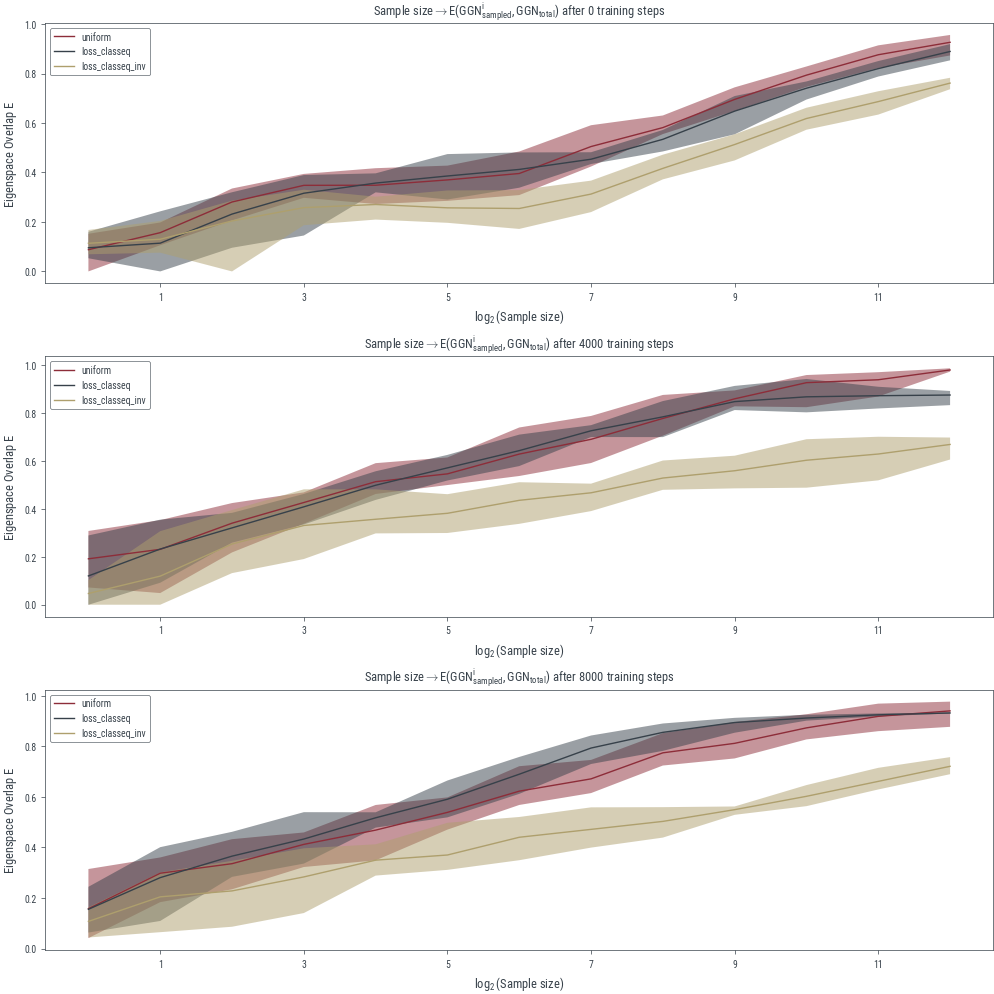

In [55]:
sampling_methods_plot = ["uniform", "loss_classeq", "loss_classeq_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods_plot:
        axs[iters_idx].plot(sample_sizes, eig_overlap_total[sampling_method][iters_idx].mean(axis=1), label=sampling_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(eig_overlap_total[sampling_method][iters_idx], axis=1), np.max(eig_overlap_total[sampling_method][iters_idx], axis=1), alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{GGN}^{i}_{\\text{sampled}}, \\text{GGN}_{\\text{total}})$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
    axs[iters_idx].legend();

### Loss-class

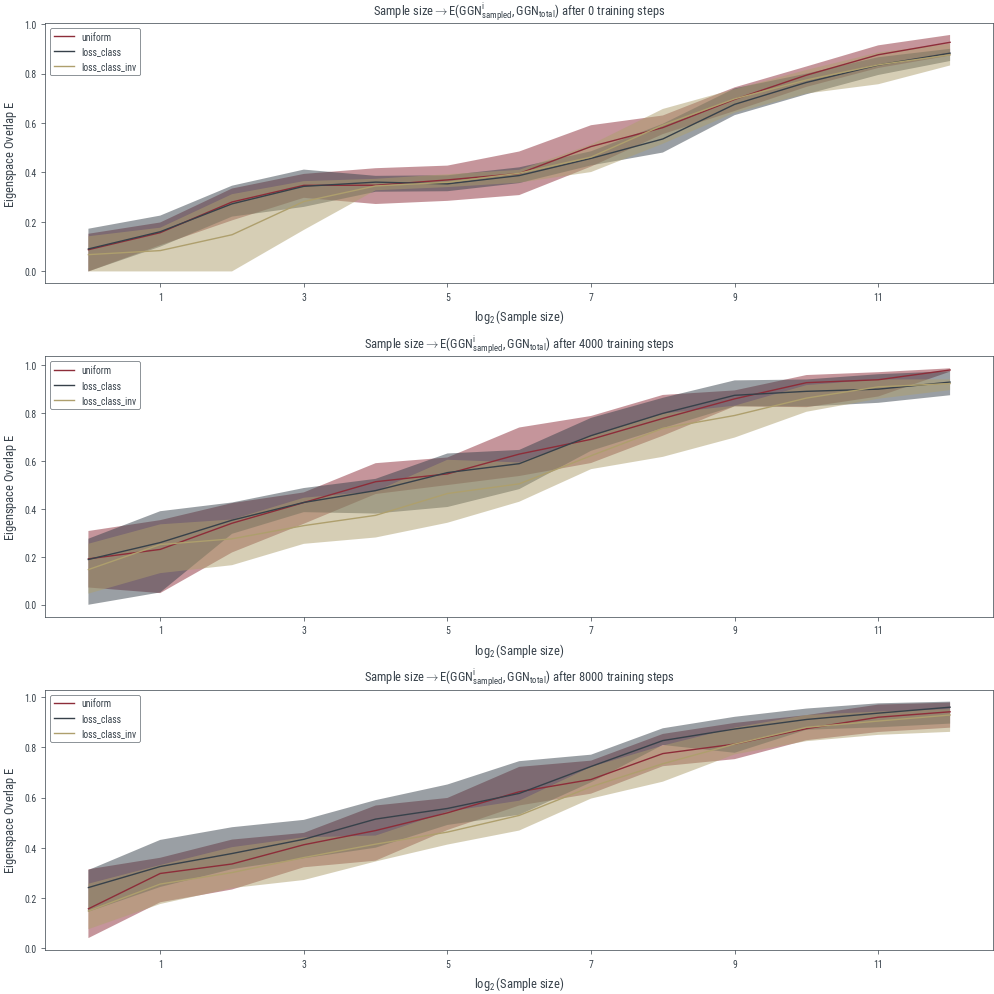

In [56]:
sampling_methods_plot = ["uniform", "loss_class", "loss_class_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods_plot:
        axs[iters_idx].plot(sample_sizes, eig_overlap_total[sampling_method][iters_idx].mean(axis=1), label=sampling_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(eig_overlap_total[sampling_method][iters_idx], axis=1), np.max(eig_overlap_total[sampling_method][iters_idx], axis=1), alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{GGN}^{i}_{\\text{sampled}}, \\text{GGN}_{\\text{total}})$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
    axs[iters_idx].legend();

### Loss

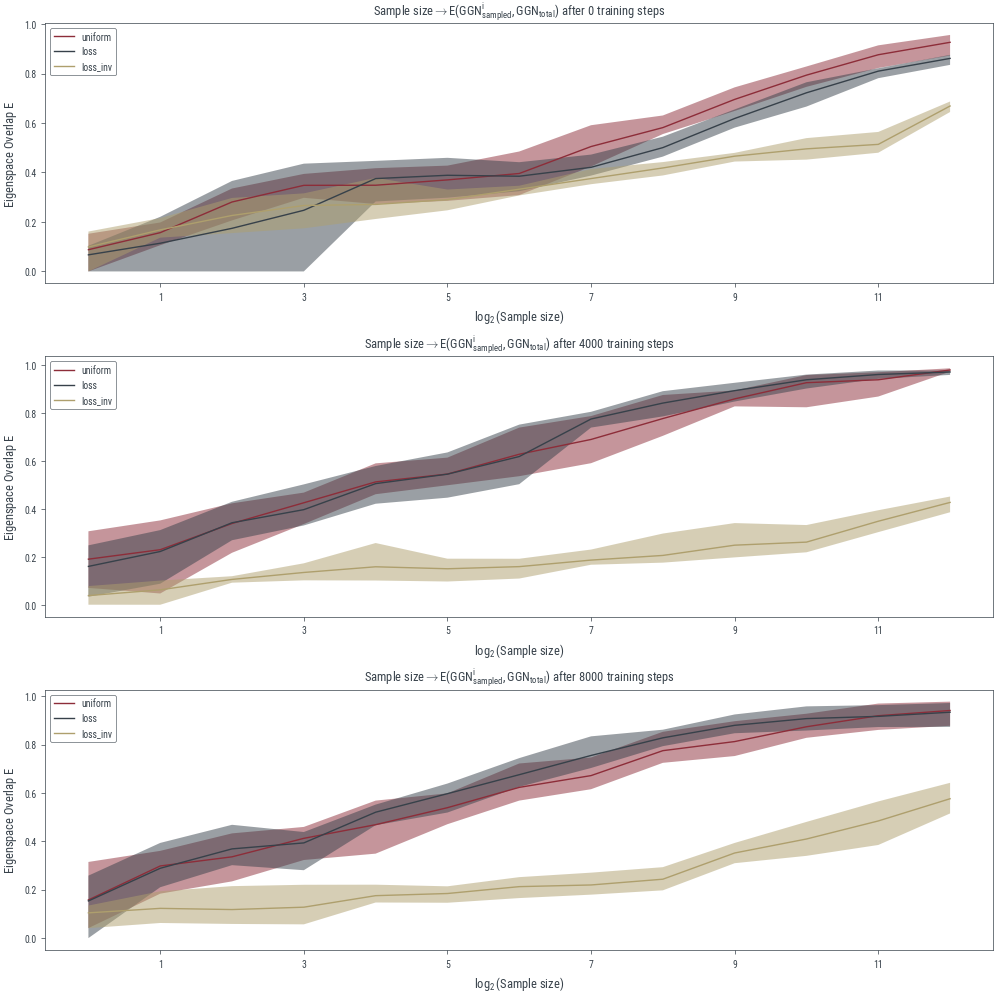

In [57]:
sampling_methods_plot = ["uniform", "loss", "loss_inv"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods_plot:
        axs[iters_idx].plot(sample_sizes, eig_overlap_total[sampling_method][iters_idx].mean(axis=1), label=sampling_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(eig_overlap_total[sampling_method][iters_idx], axis=1), np.max(eig_overlap_total[sampling_method][iters_idx], axis=1), alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{GGN}^{i}_{\\text{sampled}}, \\text{GGN}_{\\text{total}})$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
    axs[iters_idx].legend();

### Best

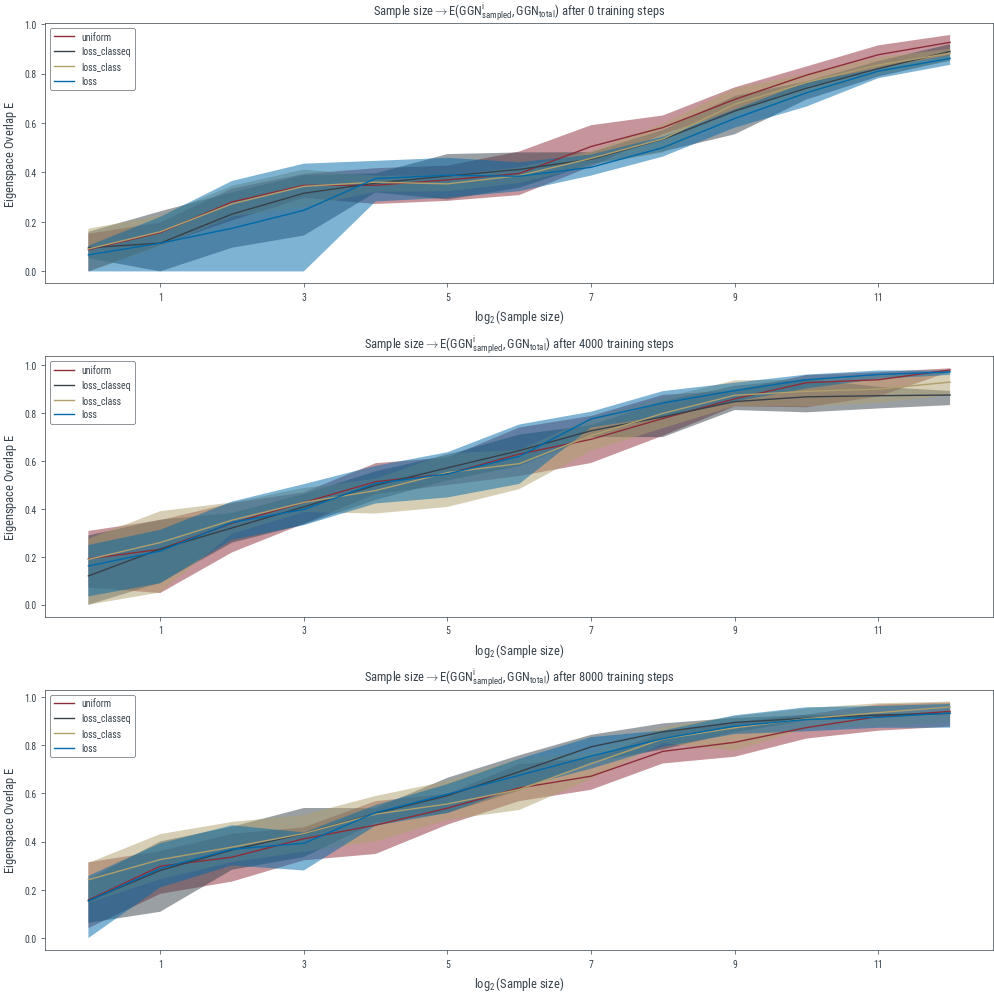

In [58]:
sampling_methods_plot = ["uniform", "loss_classeq", "loss_class", "loss"]
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods_plot:
        axs[iters_idx].plot(sample_sizes, eig_overlap_total[sampling_method][iters_idx].mean(axis=1), label=sampling_method)
        axs[iters_idx].fill_between(sample_sizes, np.min(eig_overlap_total[sampling_method][iters_idx], axis=1), np.max(eig_overlap_total[sampling_method][iters_idx], axis=1), alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{GGN}^{i}_{\\text{sampled}}, \\text{GGN}_{\\text{total}})$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
    axs[iters_idx].legend();

## Laplace Approximations:

In [30]:
results_path = "../results_v6/la_14px/"
min_exp = 0
max_exp = 13
n_samples = 8
n_steps = 9375
sampling_methods = ["uniform", "loss_classeq", "loss_classeq_inv", "total"]

sample_sizes = [2**x for x in range(min_exp, max_exp)]

In [34]:
ltk_results = {}

for sampling_method in sampling_methods:
    ltk_results[sampling_method] = []
    if sampling_method == "total":
        ltk_results[sampling_method].append(np.load(str(Path(results_path, f"LTK_total_{n_steps}.npy"))))
    else:
        for batch_size in sample_sizes:
            ltk_results[sampling_method].append(np.load(str(Path(results_path, sampling_method, f"LTK_{batch_size}_batched_{n_steps}.npy"))))
        ltk_results[sampling_method] = np.stack(ltk_results[sampling_method], axis=0)

In [4]:
### !!! ONLY DEBUG DATA !!! ###

C = 10
N = 10_000

ltk_results = {}

for sampling_method in sampling_methods:
    ltk_results[sampling_method] = []
    if sampling_method == "total":
        ltk_results[sampling_method].append(np.random.randn(N, C, C))
    else:
        for batch_size in sample_sizes:
            ltk_results[sampling_method].append(np.random.randn(n_samples, N, C, C))
        ltk_results[sampling_method] = np.stack(ltk_results[sampling_method], axis=0)

In [35]:
f_distances = {}
f_range = {}

for sampling_method in sampling_methods:
    if sampling_method == "total":
        continue
    
    f_distances[sampling_method] = np.linalg.norm(np.broadcast_to(ltk_results["total"][0][None, None, ...], ltk_results[sampling_method].shape) - ltk_results[sampling_method], ord="fro", axis=(-1, -2))
    f_range[sampling_method] = np.stack([np.amin(f_distances[sampling_method], axis=(-1, -2)), np.amax(f_distances[sampling_method], axis=(-1, -2))], axis=1)

### F-norm distributions:

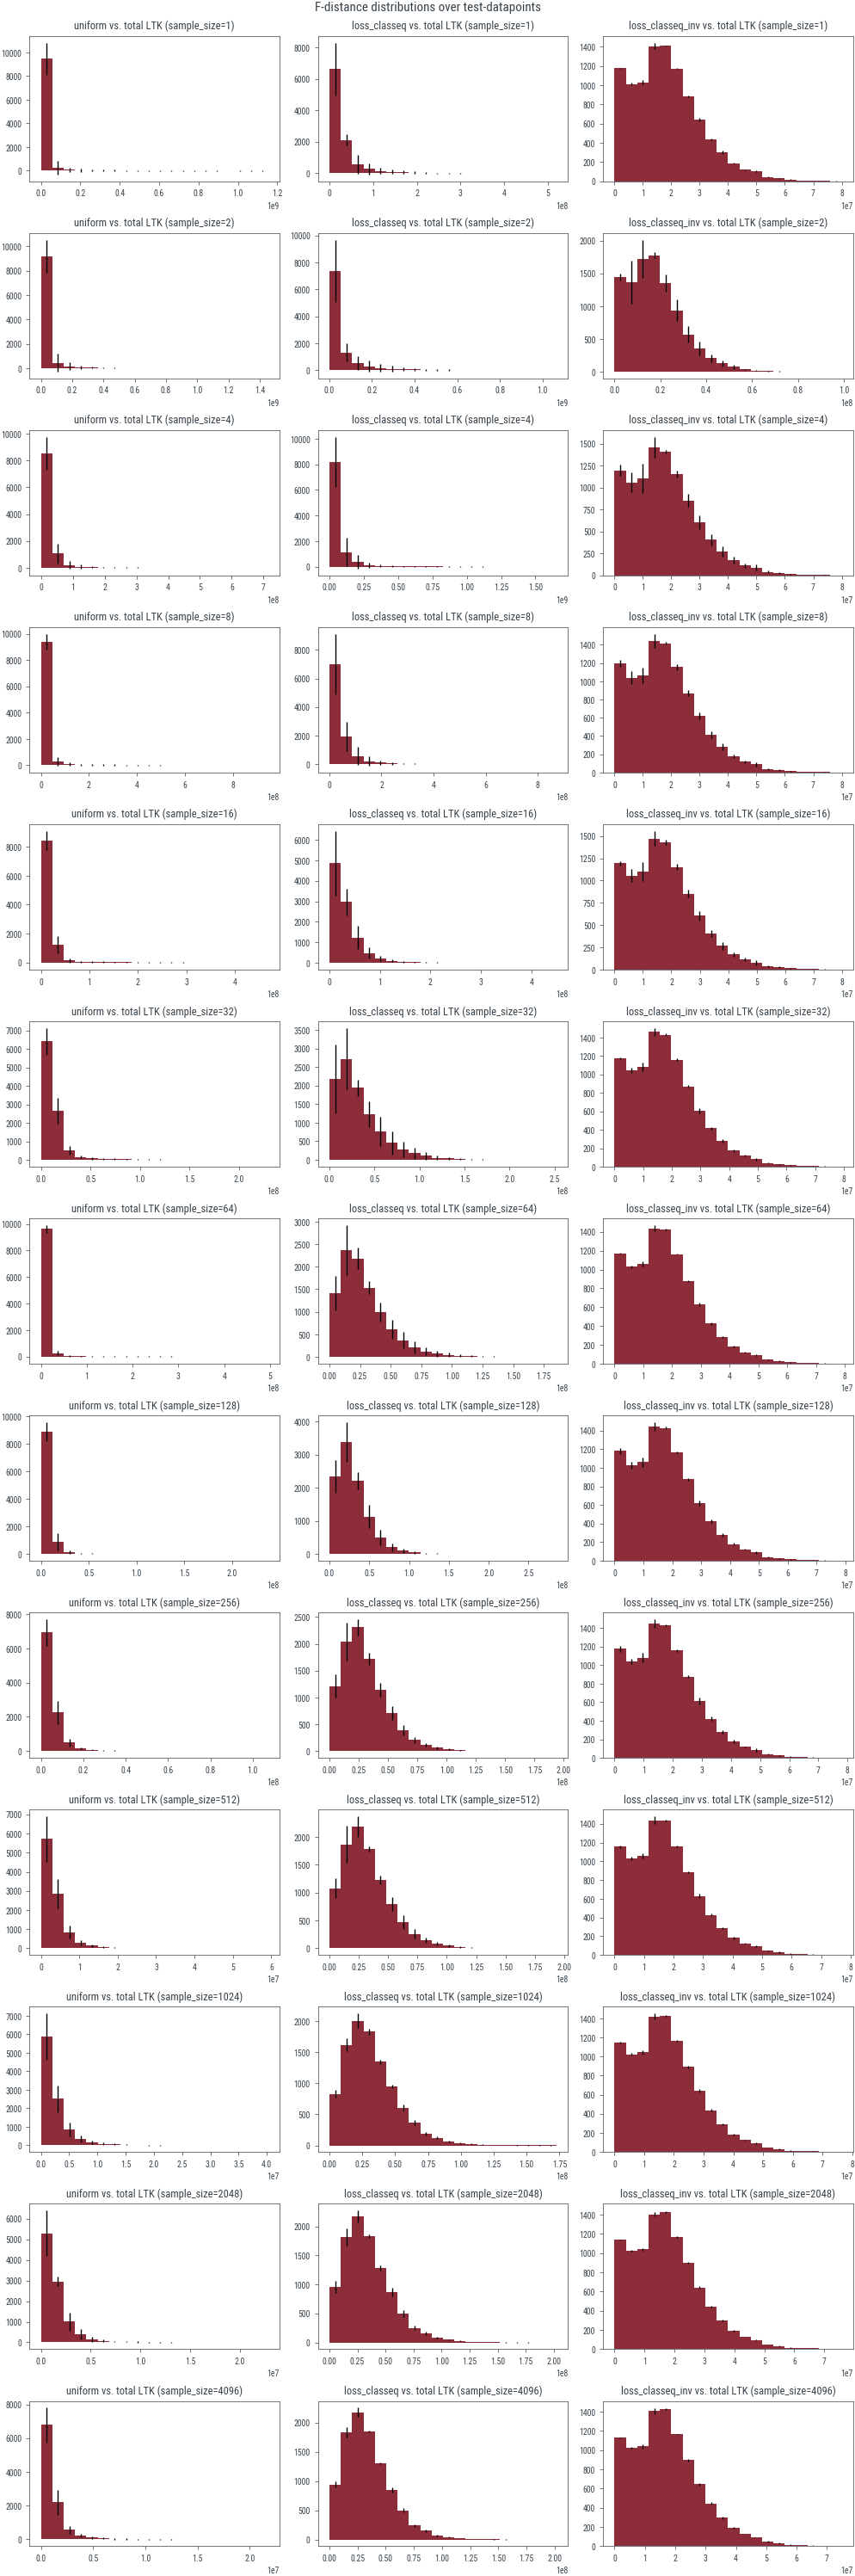

In [42]:
n_bins = 20
sampling_methods_plot = ["uniform", "loss_classeq", "loss_classeq_inv"]
fig, axs = plt.subplots(len(sample_sizes), len(sampling_methods_plot), figsize=(10, 30))

for samples_idx, sample_size in enumerate(sample_sizes):
    for method_idx, sampling_method in enumerate(sampling_methods_plot):
        _, edges = np.histogram(f_distances[sampling_method][samples_idx, 0], bins=n_bins, range=(f_range[sampling_method][samples_idx, 0],f_range[sampling_method][samples_idx, 1]))
        ys = np.stack([np.histogram(f_distances[sampling_method][samples_idx, sample_idx], bins=n_bins, range=(f_range[sampling_method][samples_idx, 0],f_range[sampling_method][samples_idx, 1]))[0] for sample_idx in range(n_samples)], axis=0)
        mid = 0.5 * (edges[1:] + edges[:-1])
        y_mean = np.mean(ys, axis=0)
        y_std = np.std(ys, axis=0, ddof=1)
        bar_width = (f_range[sampling_method][samples_idx, 1] - f_range[sampling_method][samples_idx, 0]) / n_bins
        axs[samples_idx, method_idx].bar(mid, y_mean, width=bar_width, yerr=y_std)
        axs[samples_idx, method_idx].set_title(f"{sampling_method} vs. total LTK (sample_size={sample_size})")

plt.suptitle("F-distance distributions over test-datapoints");

### Visual comparison with examples:

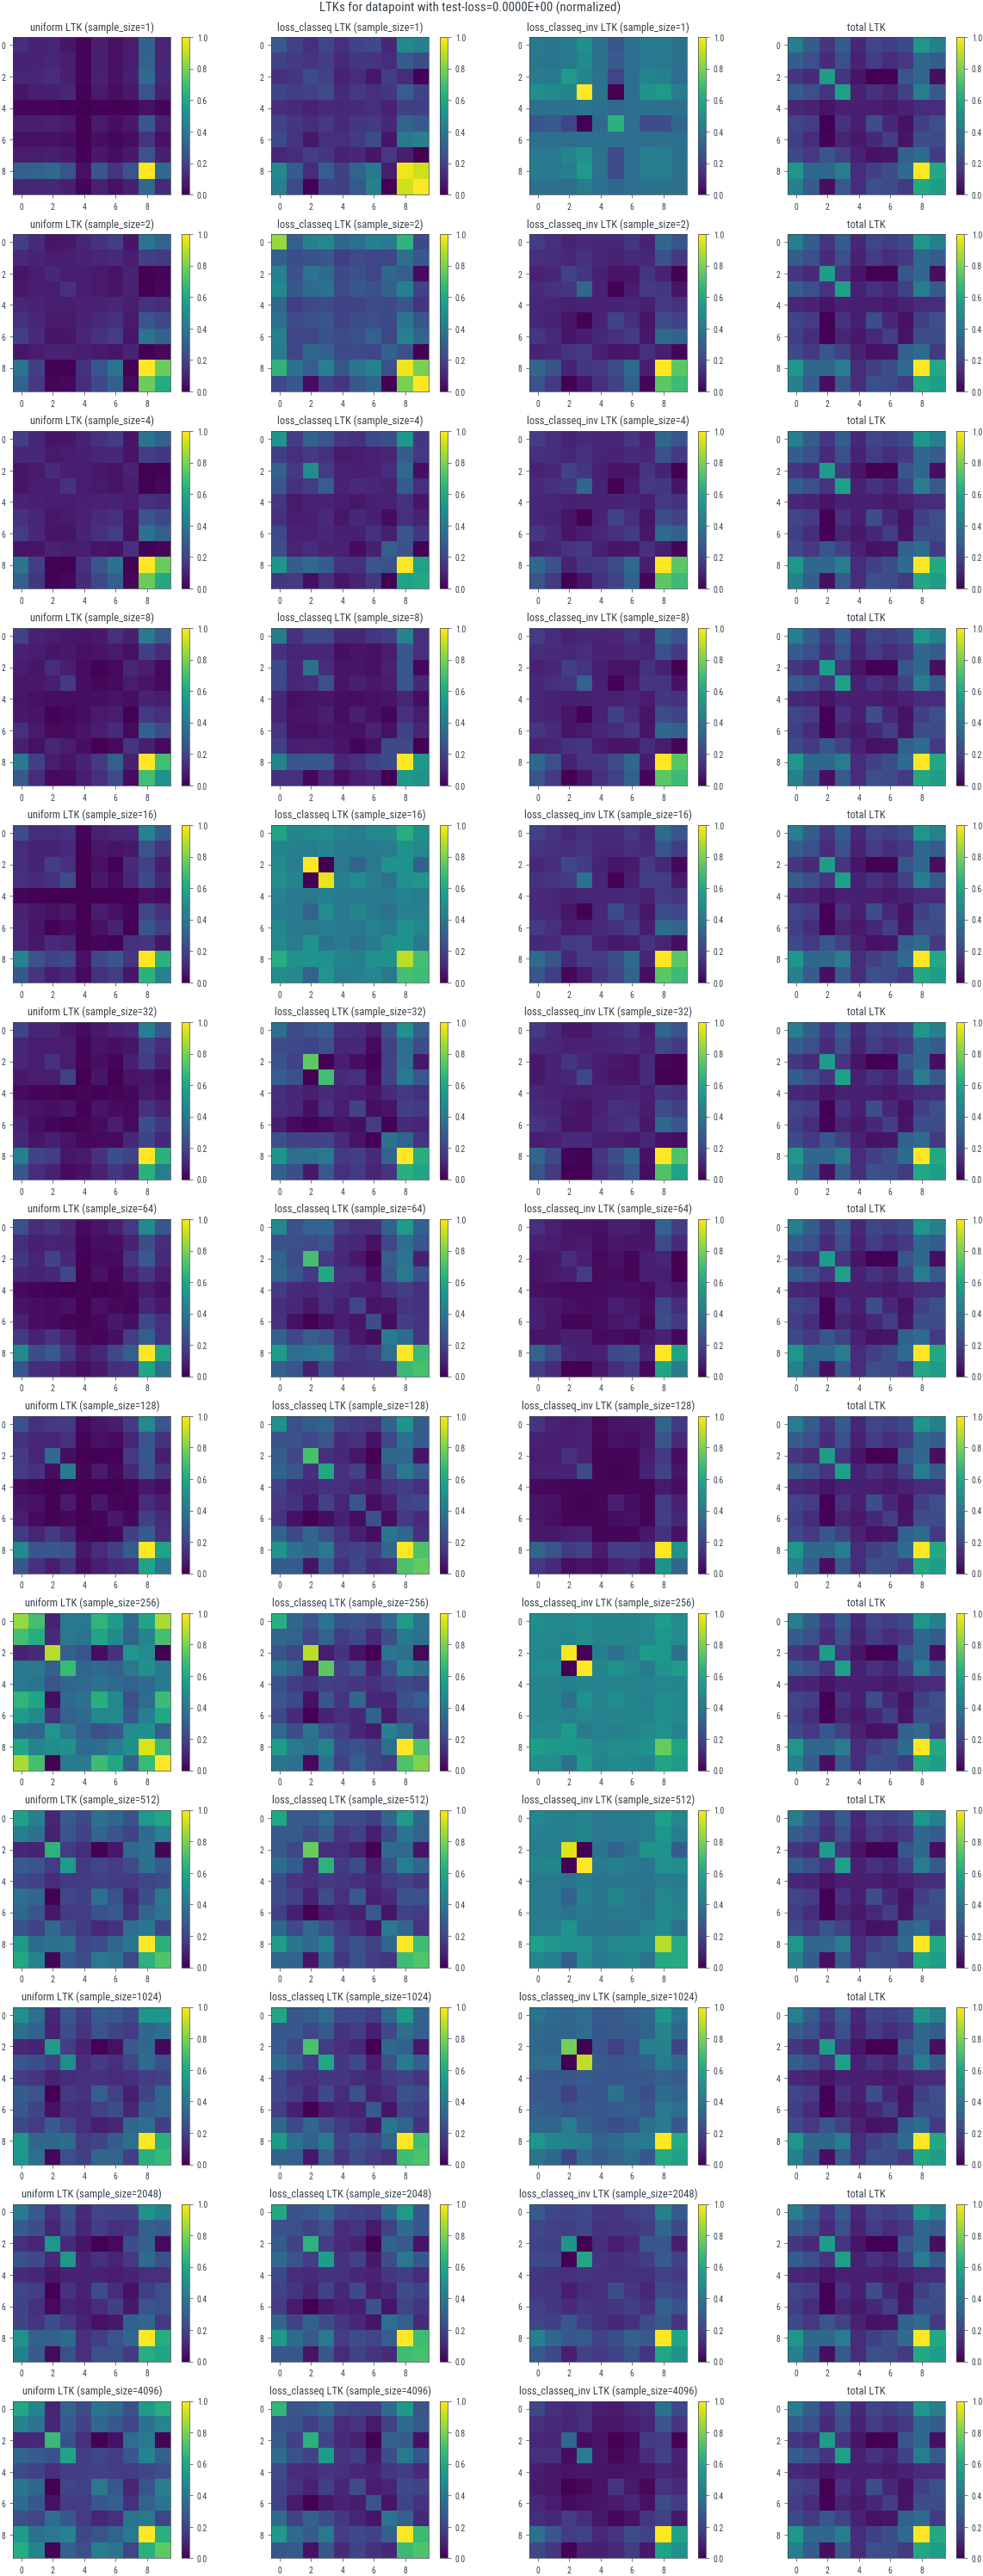

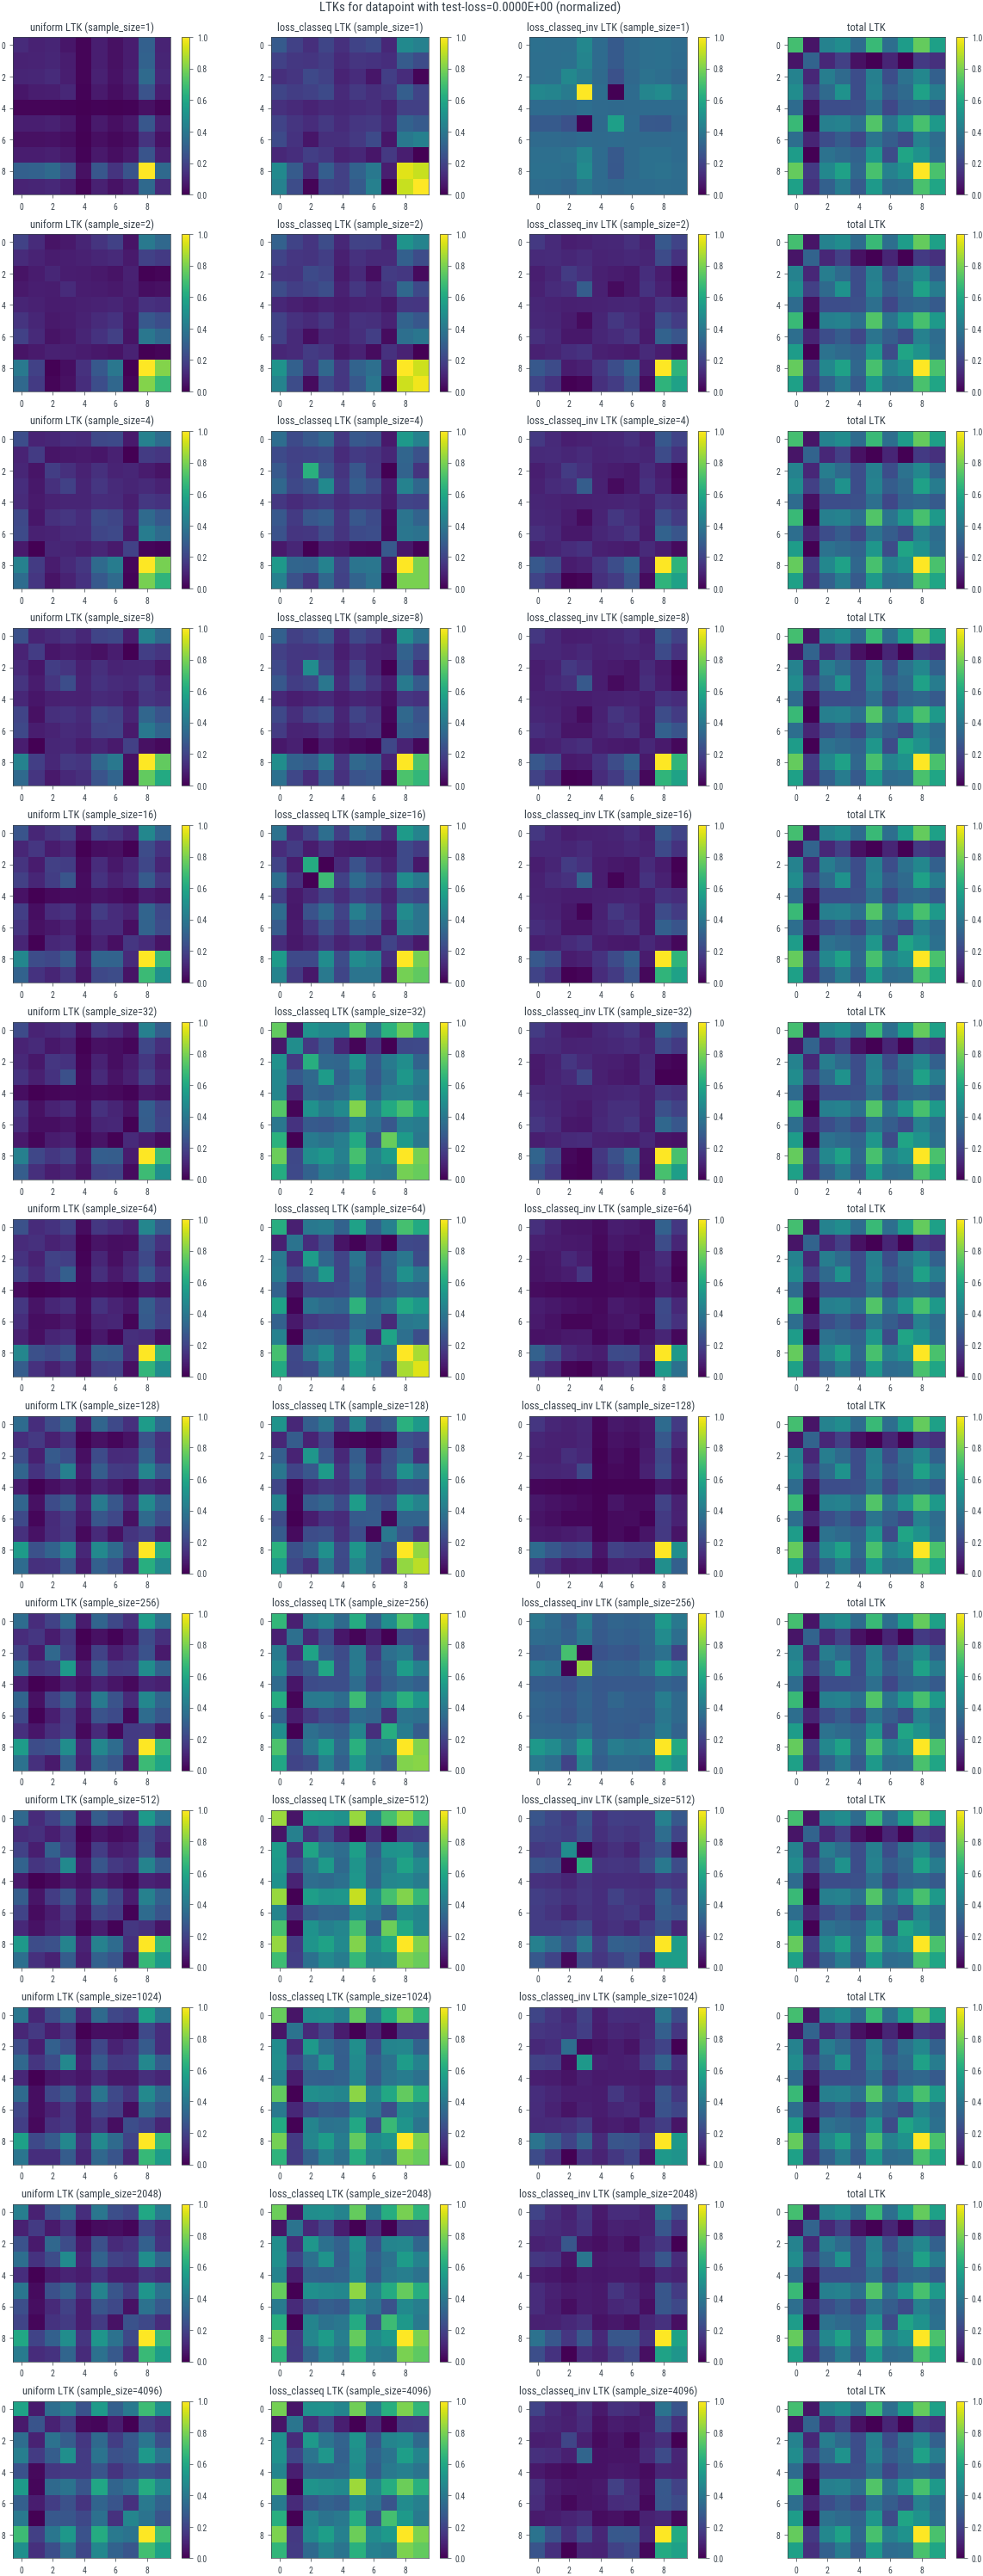

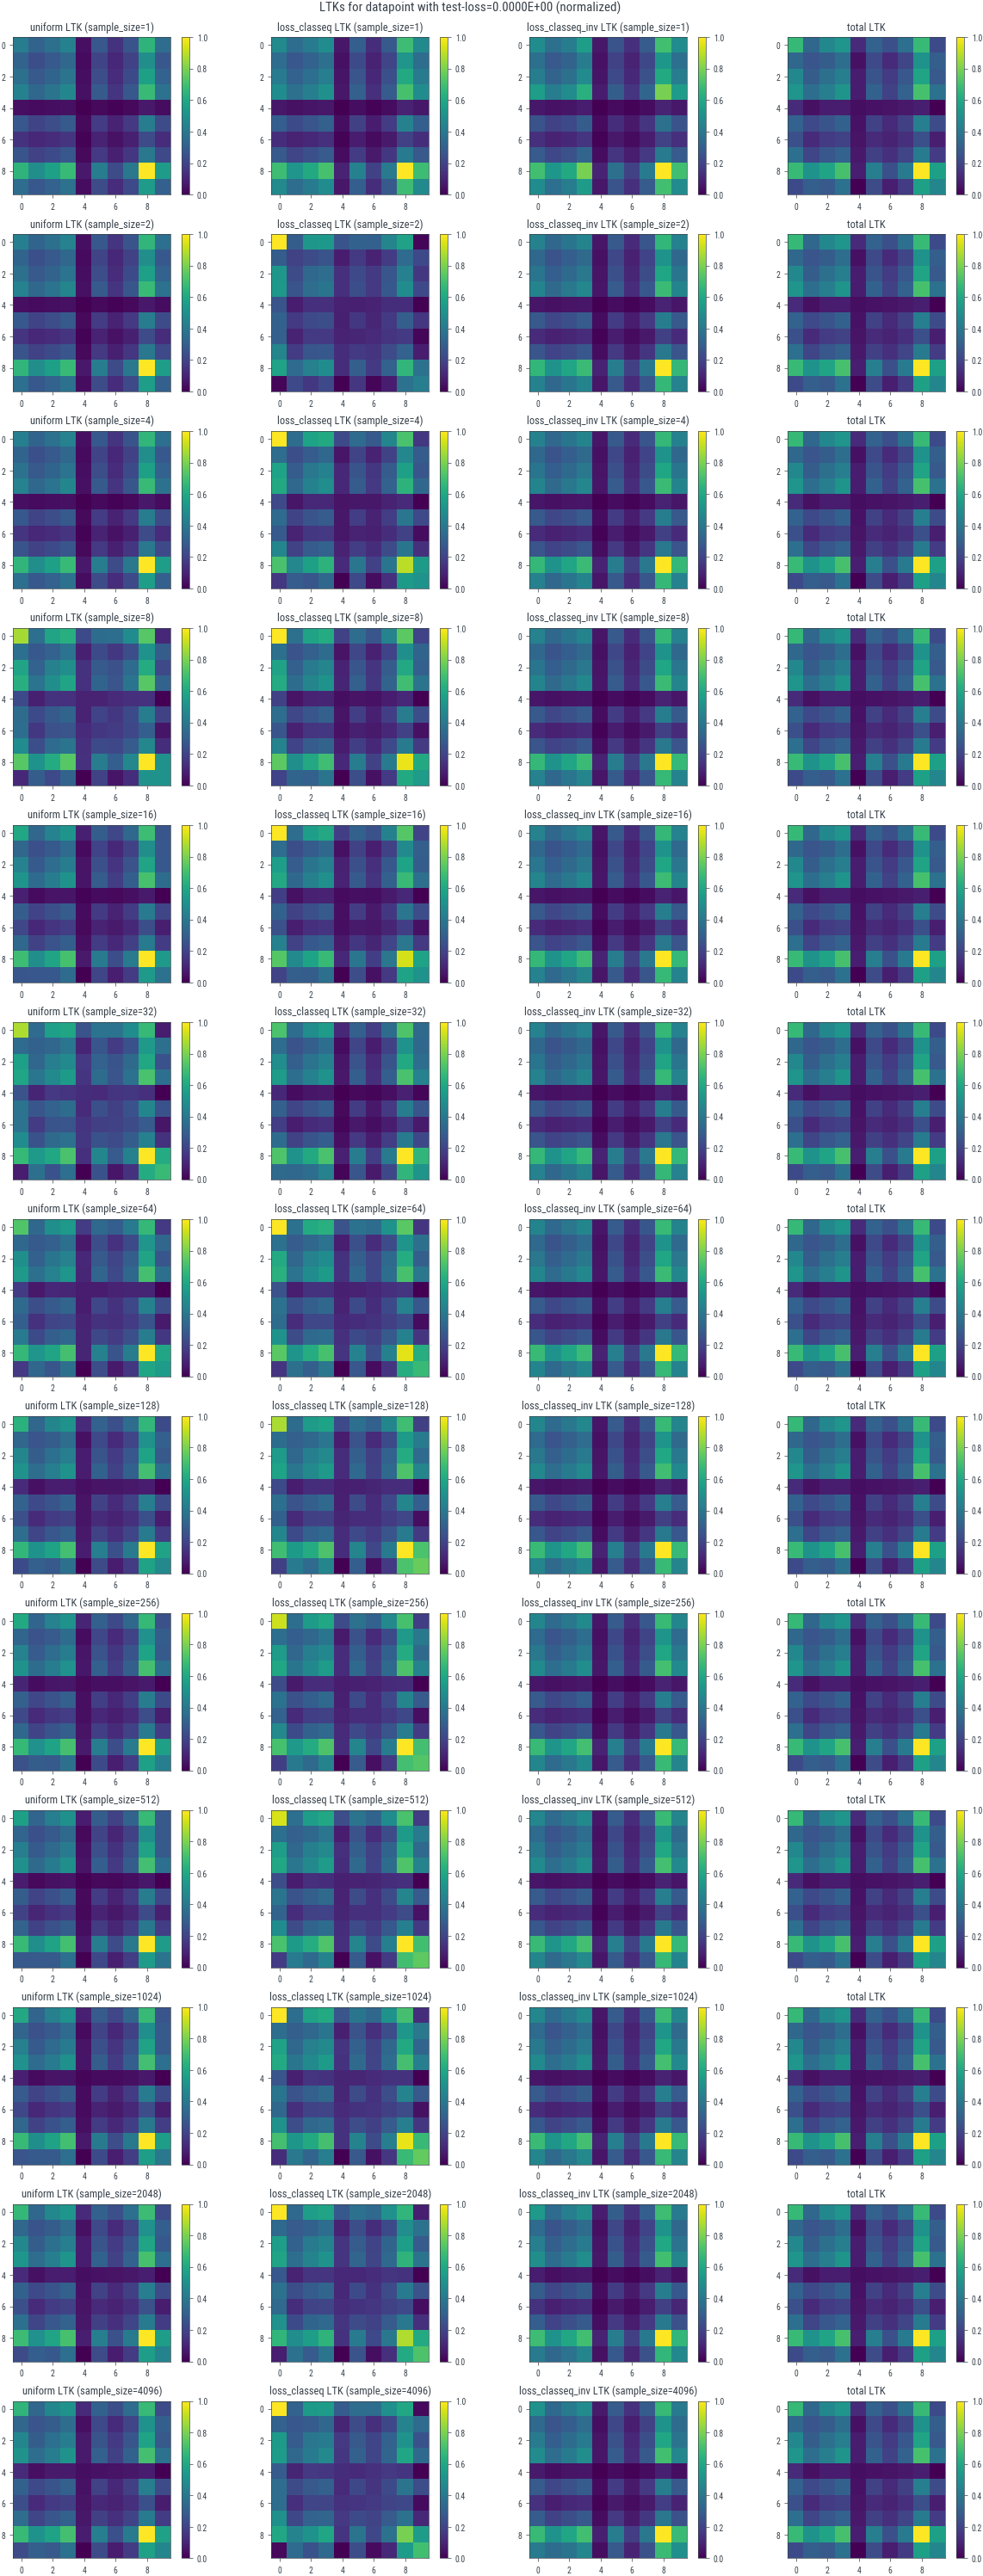

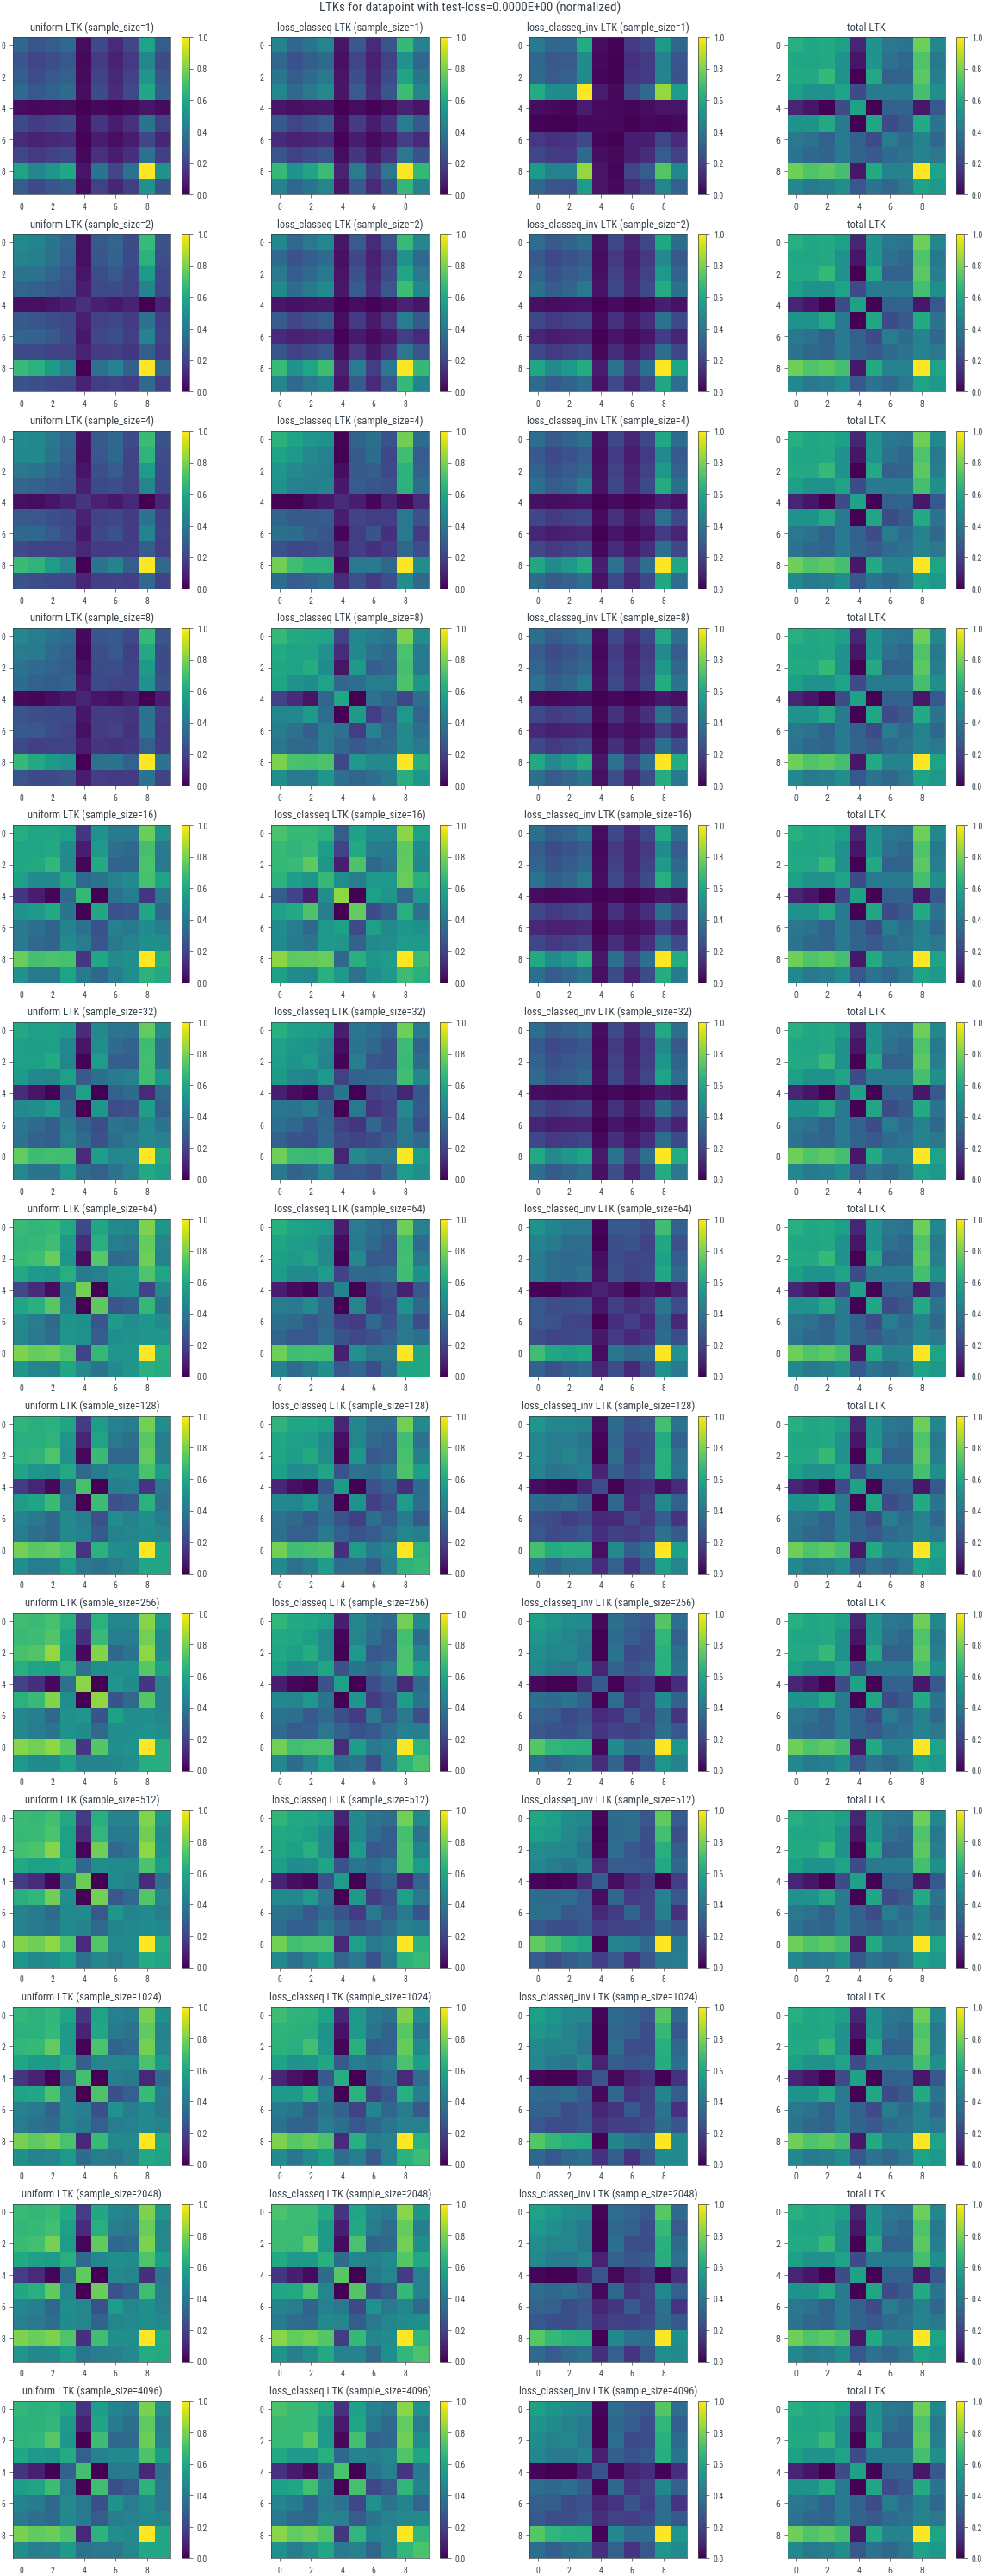

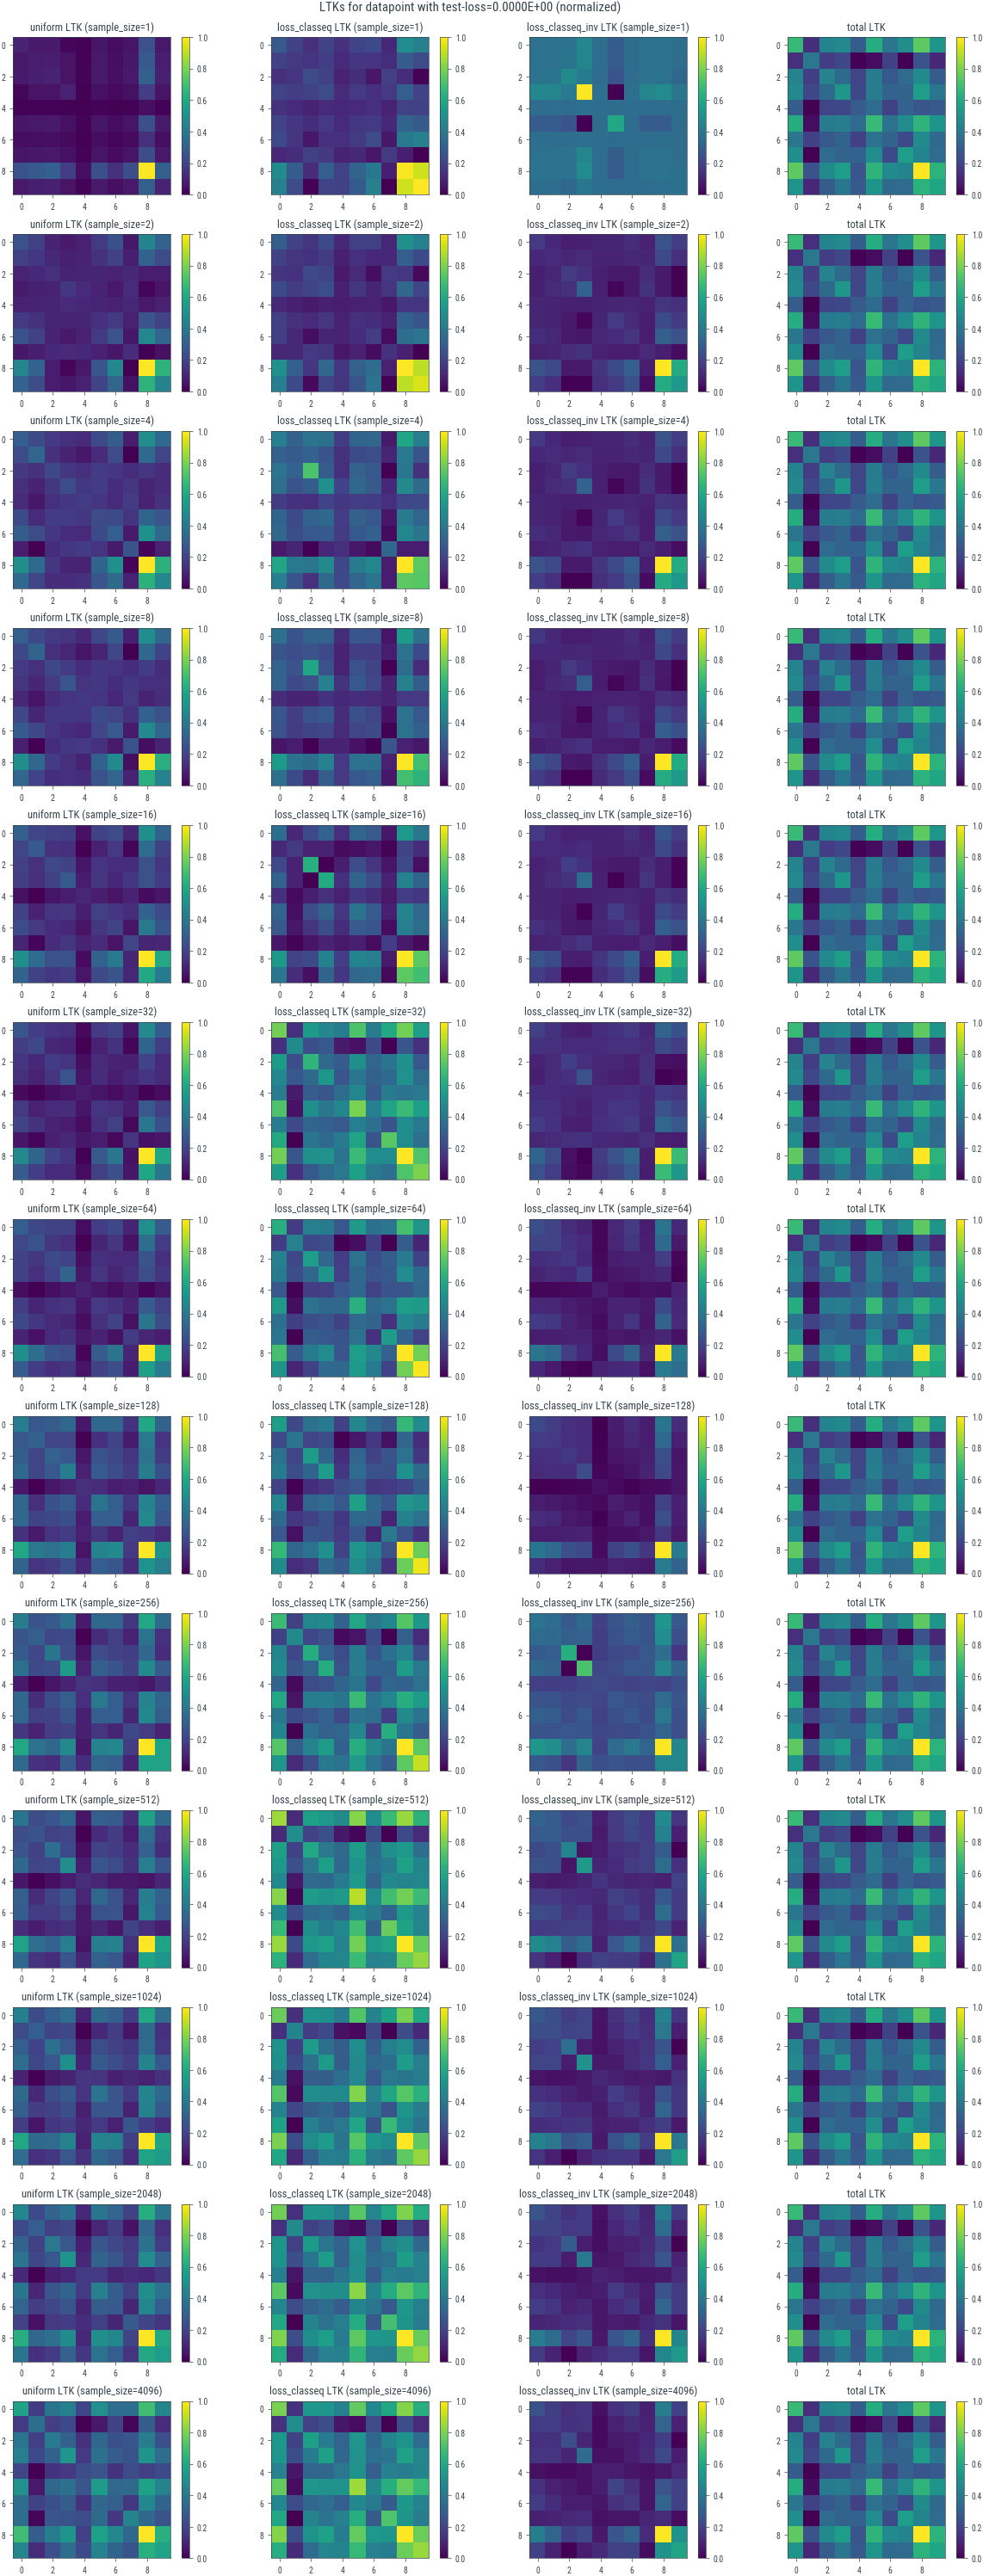

In [44]:
data_indices = {idx: 0 for idx in range(1, 6)}

for data_idx, loss in data_indices.items():
    fig, axs = plt.subplots(len(sample_sizes), len(sampling_methods), figsize=(12, 30))

    for samples_idx, sample_size in enumerate(sample_sizes):
        for method_idx, sampling_method in enumerate(sampling_methods):
            if sampling_method == "total":
                ltk = ltk_results[sampling_method][0][data_idx]
            else:
                ltk = ltk_results[sampling_method][samples_idx, 0, data_idx]
            
            ltk = (ltk - np.amin(ltk)) / (np.amax(ltk) - np.amin(ltk))
            
            p = axs[samples_idx, method_idx].imshow(ltk)
            fig.colorbar(p)
            
            if sampling_method == "total":
                axs[samples_idx, method_idx].set_title(f"{sampling_method} LTK")
            else:
                axs[samples_idx, method_idx].set_title(f"{sampling_method} LTK (sample_size={sample_size})")
    
    plt.suptitle(f"LTKs for datapoint with test-loss={loss:.4E} (normalized)")
    plt.show();